In [1]:
import pandas as pd
from scipy import stats
import numpy as np

In [2]:
df_nickel = pd.read_csv('../Data/nickel.csv')

In [3]:
df_production_consumption = pd.read_csv('../Data/nickel_production_consumption.csv')

In [4]:
df_nickel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   기준일      84 non-null     object 
 1   기준가격     84 non-null     float64
 2   재고량      84 non-null     int64  
 3   수급안정화지수  84 non-null     float64
 4   환율       84 non-null     float64
 5   생산량      84 non-null     float64
 6   소비량      84 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 4.7+ KB


In [5]:
df_nickel

,기준일,기준가격,재고량,수급안정화지수,환율,생산량,소비량
0,2017-01-01,9984.29,374047,76.63,1169.209961,172.16,174.21
1,2017-02-01,10619.50,381745,78.24,1133.939941,172.16,174.21
2,2017-03-01,10230.43,381883,74.56,1117.020020,172.16,174.21
3,2017-04-01,9668.61,375819,77.10,1135.640015,172.16,174.21
4,2017-05-01,9154.29,380589,80.06,1123.900024,172.16,174.21
...,...,...,...,...,...,...,...
79,2023-08-01,20497.73,37074,28.00,1323.030029,285.77,264.30
80,2023-09-01,19629.05,39516,30.97,1351.930054,285.77,264.30
81,2023-10-01,18255.23,43572,31.98,1348.069946,285.77,264.30
82,2023-11-01,16979.77,43515,41.74,1288.359985,285.77,264.30


In [6]:
# 'date' 컬럼을 날짜 형식으로 변환
df_nickel['기준일'] = pd.to_datetime(df_nickel['기준일'])

In [7]:
df_production_consumption

,연도,생산량,소비량
0,2017,2065.960,2090.518
1,2018,2251.992,2339.103
2,2019,2430.243,2430.139
3,2020,2528.167,2442.837
4,2021,2784.683,2962.181
5,2022,3089.143,3003.505
6,2023,3429.284,3171.547


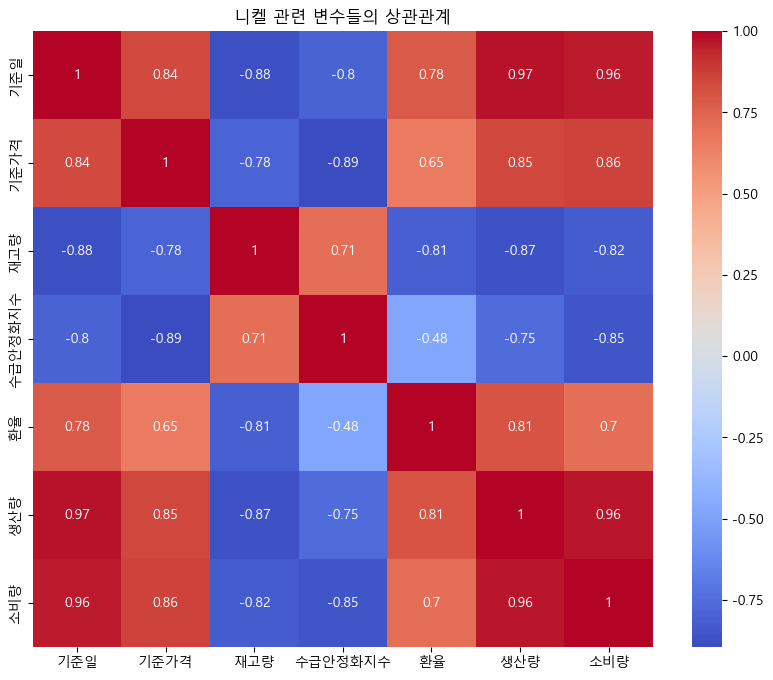

In [8]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.dates as mdates

plt.rc('font', family='Malgun Gothic')
%matplotlib inline

matplotlib.rcParams['axes.unicode_minus']=False
plt.figure(figsize=(10, 8))
sns.heatmap(df_nickel.corr(), annot=True, cmap='coolwarm')
plt.title('니켈 관련 변수들의 상관관계')
plt.show()

소비량과 생산량이 클수록, 수급안정화지수와 LME(London Metal Exchange) 재고량이 낮을수록 가격이 높아짐

Text(0, 0.5, 'LME stock')

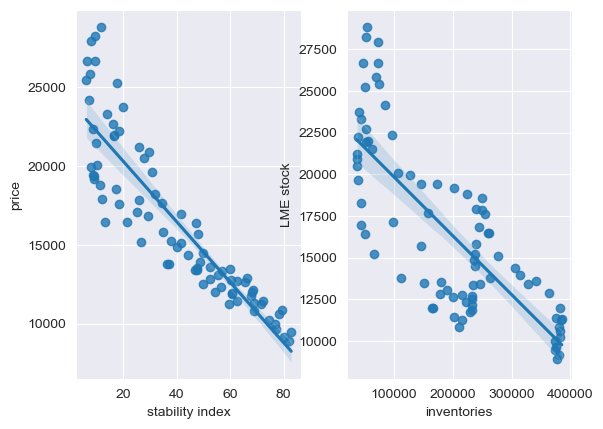

In [9]:
# 수급안정화지수과 재고량과 가격의 관계 관찰

sns.set_style('darkgrid')
sns.set_style(rc={'figure.figsize':(12,6)})

fig, ax = plt.subplots(ncols=2)
sns.regplot(x='수급안정화지수', y='기준가격', data=df_nickel, ax=ax[0])
ax[0].set_xlabel('stability index')
ax[0].set_ylabel('price')

sns.regplot(x='재고량', y='기준가격', data=df_nickel, ax=ax[1])
ax[1].set_xlabel('inventories')
ax[1].set_ylabel('LME stock')

## PROPHET

In [12]:
from prophet_utils import *
import warnings
warnings.filterwarnings("ignore")

### 니켈 가격

<Axes: >

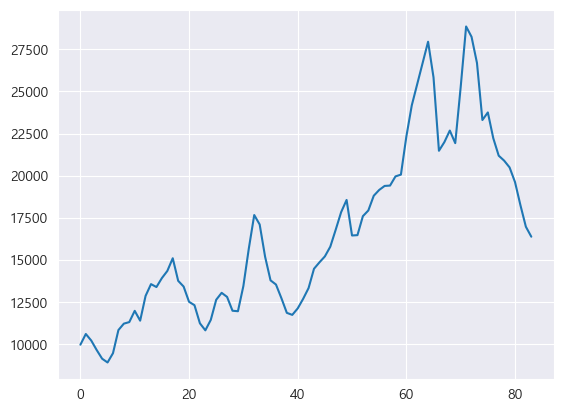

In [13]:
df_nickel['기준가격'].plot()

Additive 모델


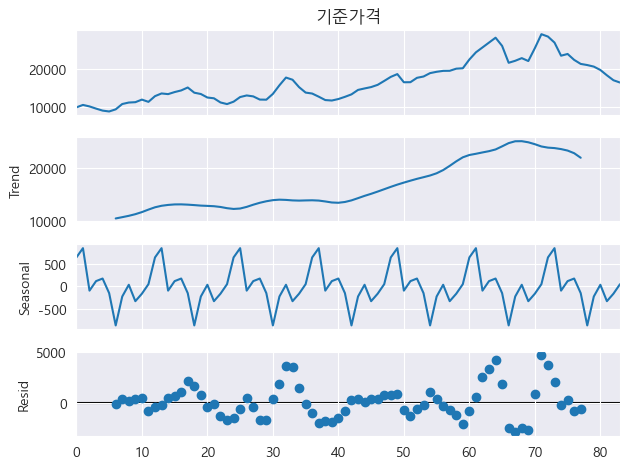

Multiplicative 모델


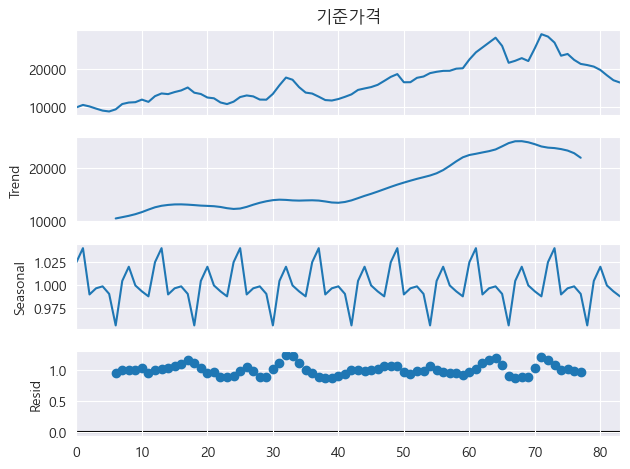

In [14]:
seasonal_decompose_graph(df_nickel, '기준가격', 12)

In [15]:
df_tmp, train, test = split_train_test(df_nickel, '기준가격')

In [16]:
df_tmp

,ds,y
0,2017-01-01,9984.29
1,2017-02-01,10619.50
2,2017-03-01,10230.43
3,2017-04-01,9668.61
4,2017-05-01,9154.29
...,...,...
79,2023-08-01,20497.73
80,2023-09-01,19629.05
81,2023-10-01,18255.23
82,2023-11-01,16979.77


13:05:44 - cmdstanpy - INFO - Chain [1] start processing
13:05:44 - cmdstanpy - INFO - Chain [1] done processing


MAE (Mean Absolute Error): 7166.507941167553
RMSE (Root Mean Squared Error): 8378.856340699665
MAPE (Mean Absolute Percentage Error): 35.35%


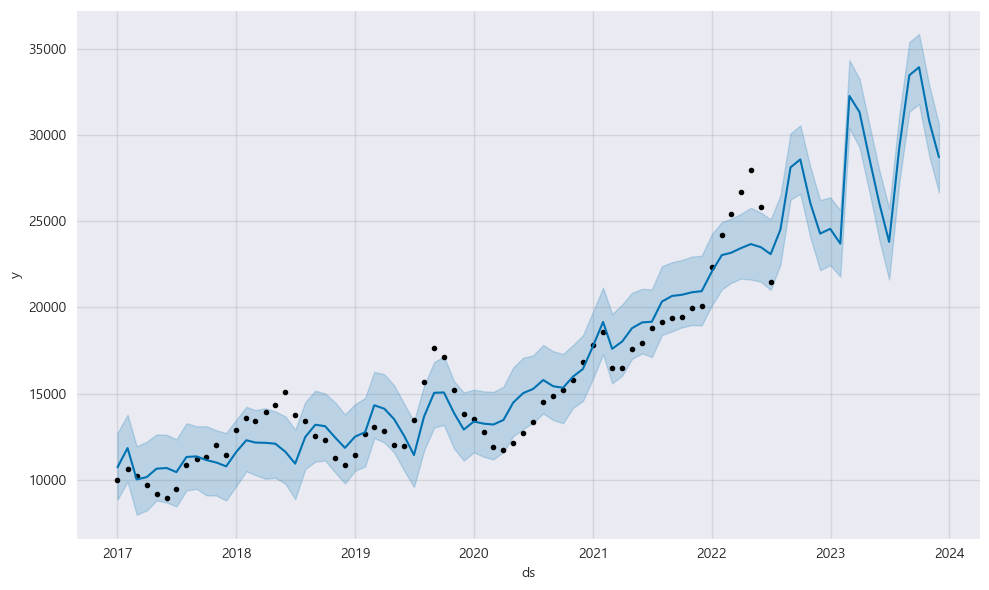

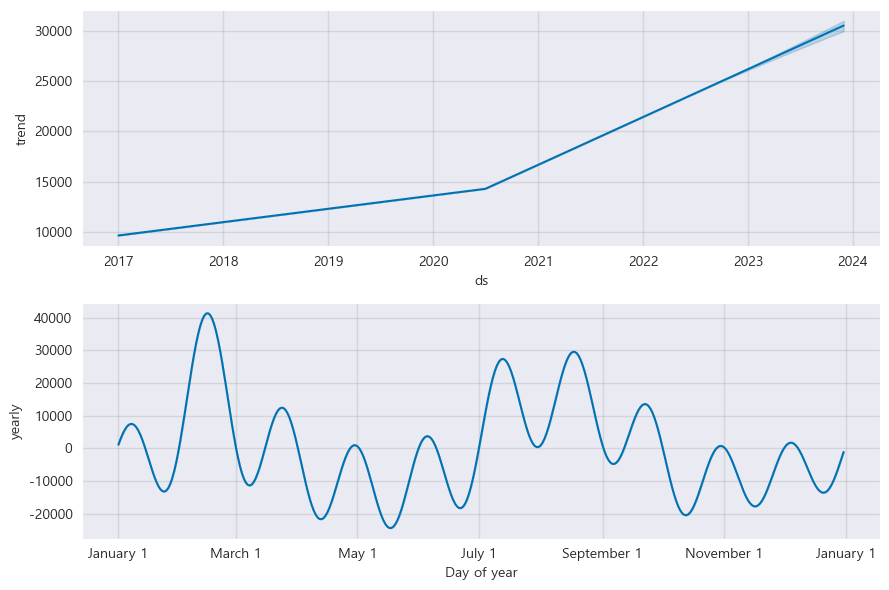

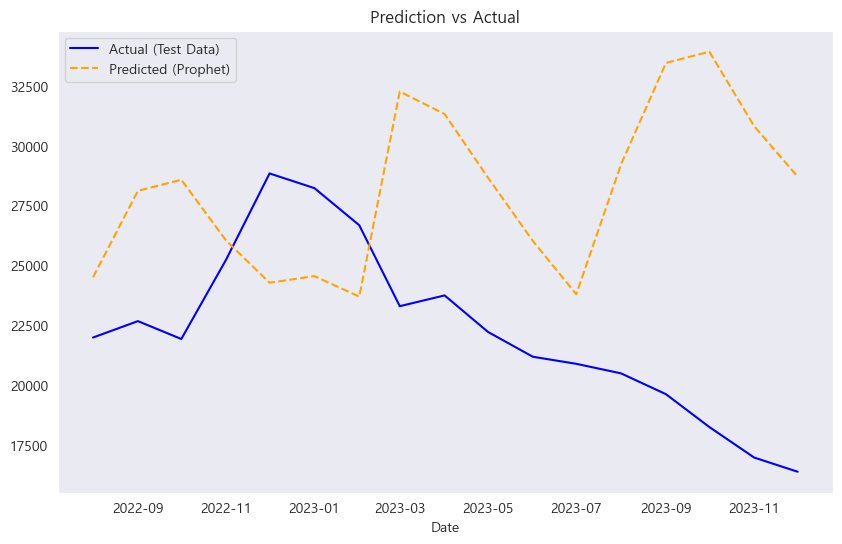

In [17]:
prophet_metrix_plot(train,test,'M')

#### 하이퍼파라미터 튜닝

In [19]:
# Grid Search를 위한 하이퍼파라미터 후보 설정
param_grid = {
    # 'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5, 1.0],
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.25, 0.5, 1.0, 2.0],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 5.0, 10.0],
    'seasonality_mode': ['multiplicative']  
}

best_params = tune_prophet_parameters(param_grid, train, test, 'M')

02:41:16 - cmdstanpy - INFO - Chain [1] start processing
02:41:16 - cmdstanpy - INFO - Chain [1] done processing
02:41:17 - cmdstanpy - INFO - Chain [1] start processing
02:41:17 - cmdstanpy - INFO - Chain [1] done processing
02:41:17 - cmdstanpy - INFO - Chain [1] start processing
02:41:17 - cmdstanpy - INFO - Chain [1] done processing
02:41:17 - cmdstanpy - INFO - Chain [1] start processing
02:41:17 - cmdstanpy - INFO - Chain [1] done processing
02:41:18 - cmdstanpy - INFO - Chain [1] start processing
02:41:18 - cmdstanpy - INFO - Chain [1] done processing
02:41:18 - cmdstanpy - INFO - Chain [1] start processing
02:41:18 - cmdstanpy - INFO - Chain [1] done processing
02:41:18 - cmdstanpy - INFO - Chain [1] start processing
02:41:18 - cmdstanpy - INFO - Chain [1] done processing
02:41:18 - cmdstanpy - INFO - Chain [1] start processing
02:41:19 - cmdstanpy - INFO - Chain [1] done processing
02:41:19 - cmdstanpy - INFO - Chain [1] start processing
02:41:19 - cmdstanpy - INFO - Chain [1]

Best Parameters: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.1, 'seasonality_mode': 'multiplicative'}
Best RMSE: 4101.526126535824


02:42:15 - cmdstanpy - INFO - Chain [1] start processing
02:42:15 - cmdstanpy - INFO - Chain [1] done processing


MAE (Mean Absolute Error): 3243.9772670758243
RMSE (Root Mean Squared Error): 4101.526126535824
MAPE (Mean Absolute Percentage Error): 15.41%


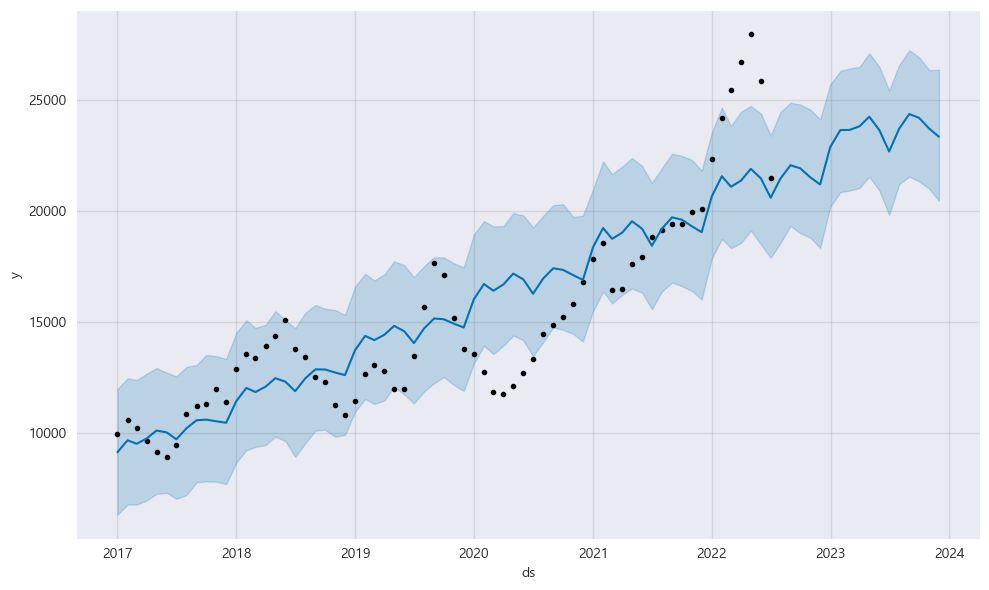

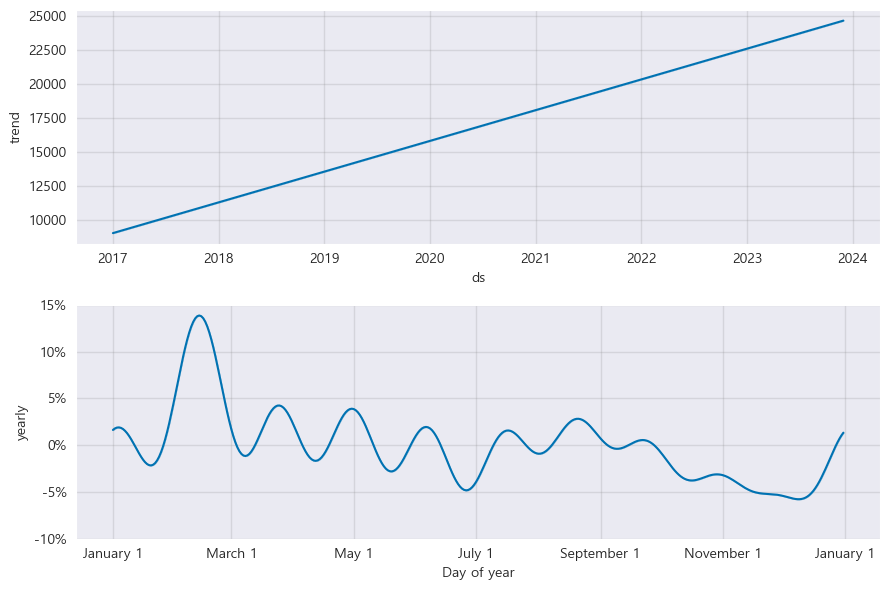

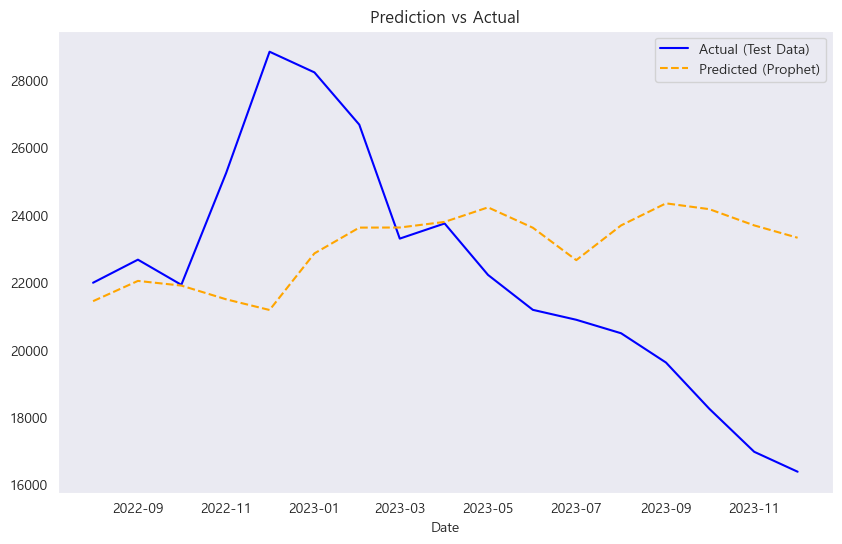

In [22]:
tune_prophet_parameters_plot(best_params, train, test, 'M')

#### 예측

02:43:12 - cmdstanpy - INFO - Chain [1] start processing
02:43:12 - cmdstanpy - INFO - Chain [1] done processing


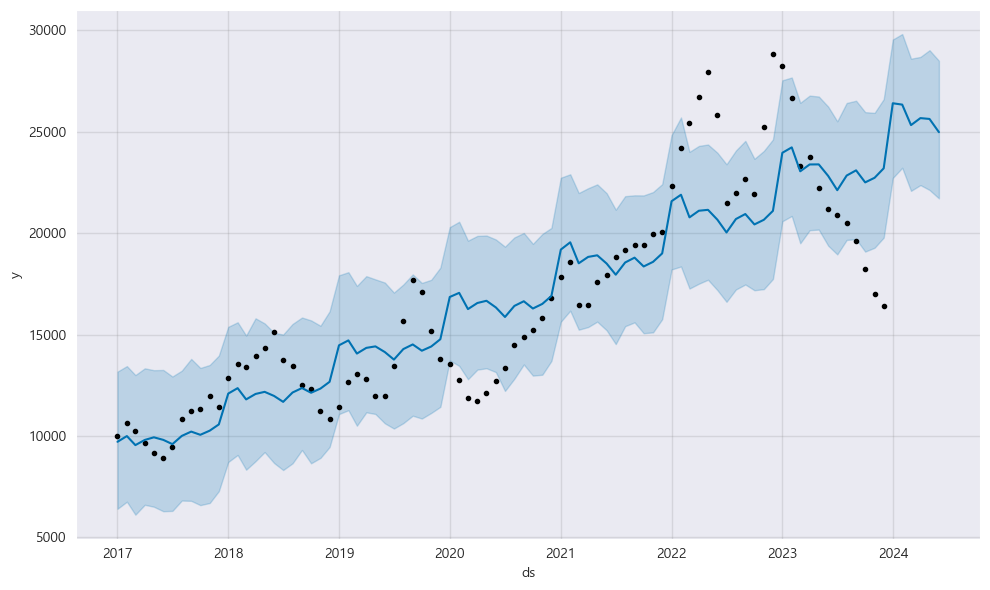

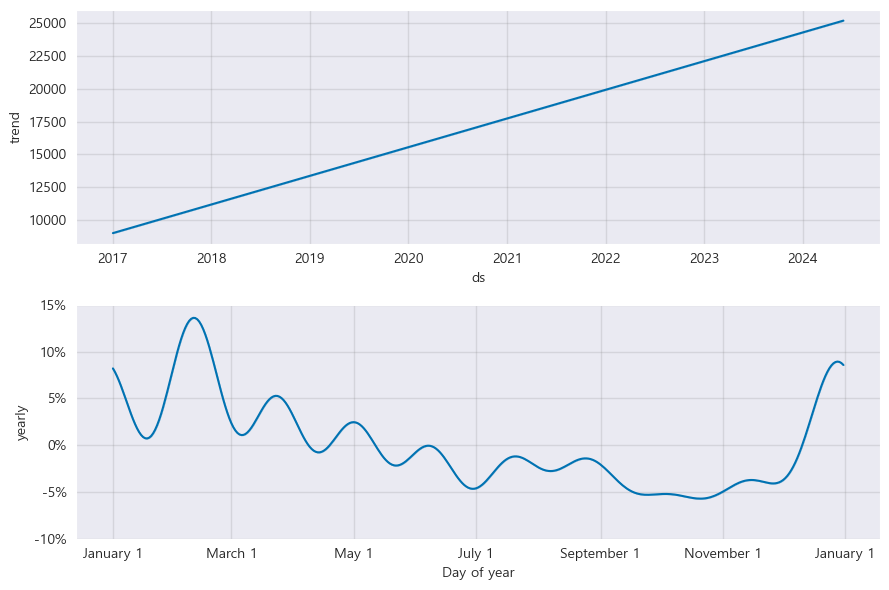

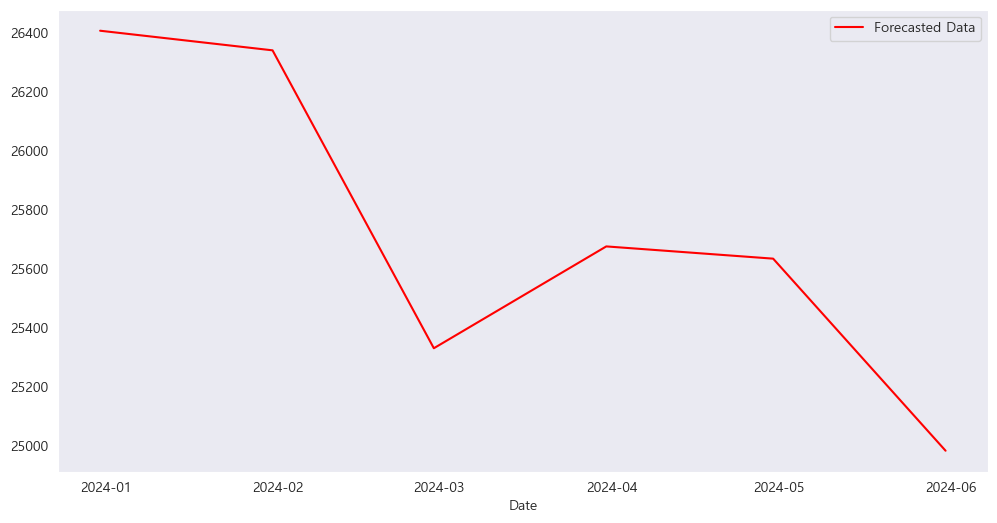

In [25]:
test_forecast = predict_2024(df_tmp, 6, 'M', 'red', best_params)

In [26]:
test_forecast[['ds','yhat']]

,ds,yhat
84,2023-12-31,26407.799177
85,2024-01-31,26341.269069
86,2024-02-29,25330.735914
87,2024-03-31,25676.138077
88,2024-04-30,25634.629688
89,2024-05-31,24983.092002


In [27]:
df_2024_forecast = test_forecast[['ds','yhat']]
df_2024_forecast = df_2024_forecast.rename(columns={'yhat':'니켈가격'})

In [28]:
df_2024_forecast

,ds,니켈가격
84,2023-12-31,26407.799177
85,2024-01-31,26341.269069
86,2024-02-29,25330.735914
87,2024-03-31,25676.138077
88,2024-04-30,25634.629688
89,2024-05-31,24983.092002


### 니켈 재고량

<Axes: >

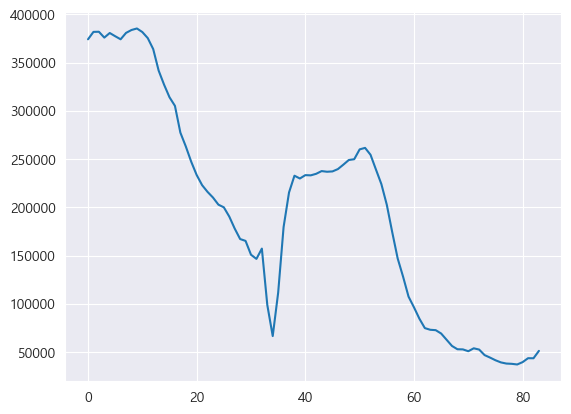

In [29]:
df_nickel['재고량'].plot()

Additive 모델


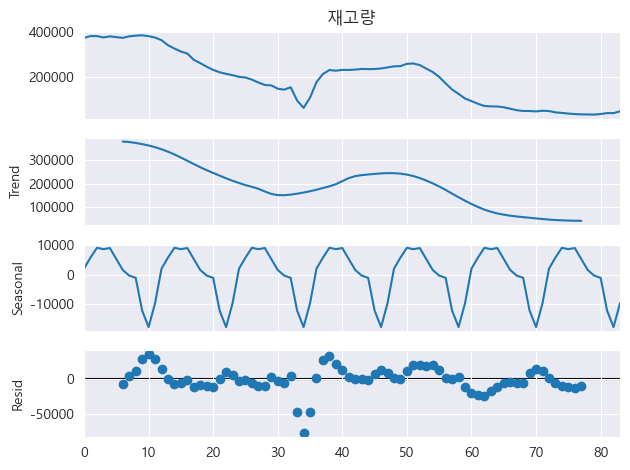

Multiplicative 모델


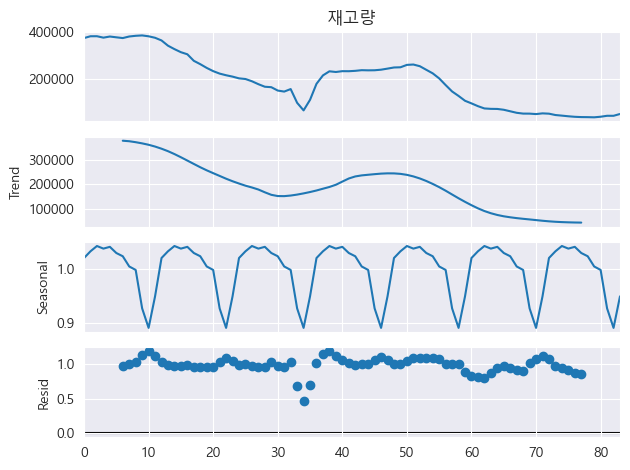

In [30]:
seasonal_decompose_graph(df_nickel, '재고량', 12)

In [31]:
df_tmp, train, test = split_train_test(df_nickel, '재고량')

02:43:35 - cmdstanpy - INFO - Chain [1] start processing
02:43:35 - cmdstanpy - INFO - Chain [1] done processing


MAE (Mean Absolute Error): 46818.997317499845
RMSE (Root Mean Squared Error): 58133.52437149476
MAPE (Mean Absolute Percentage Error): 101.02%


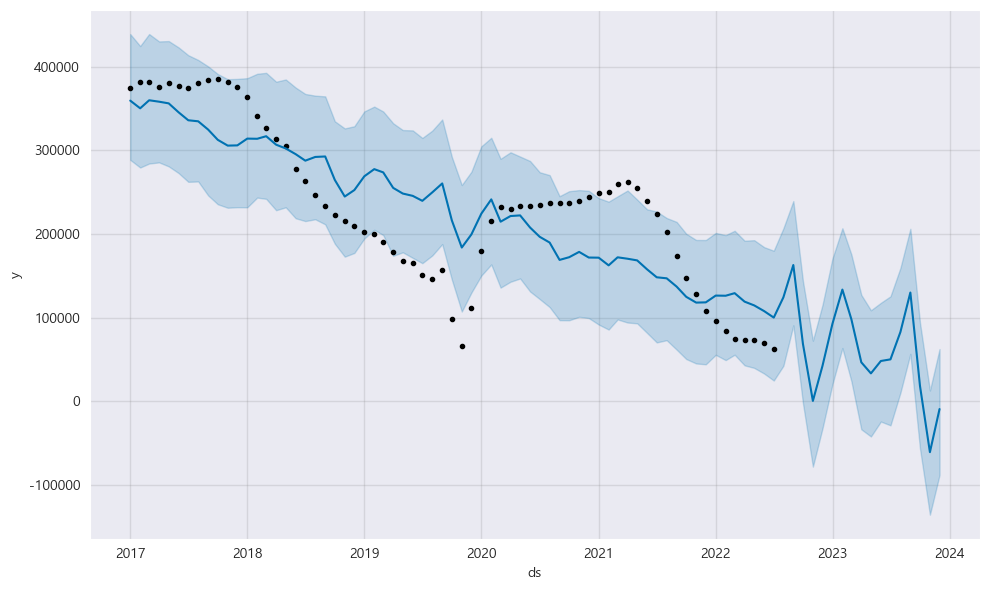

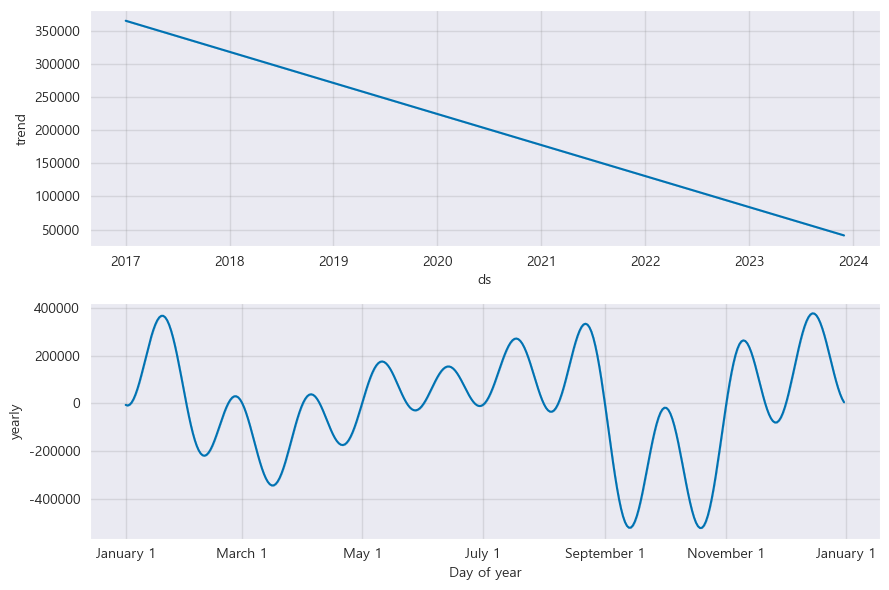

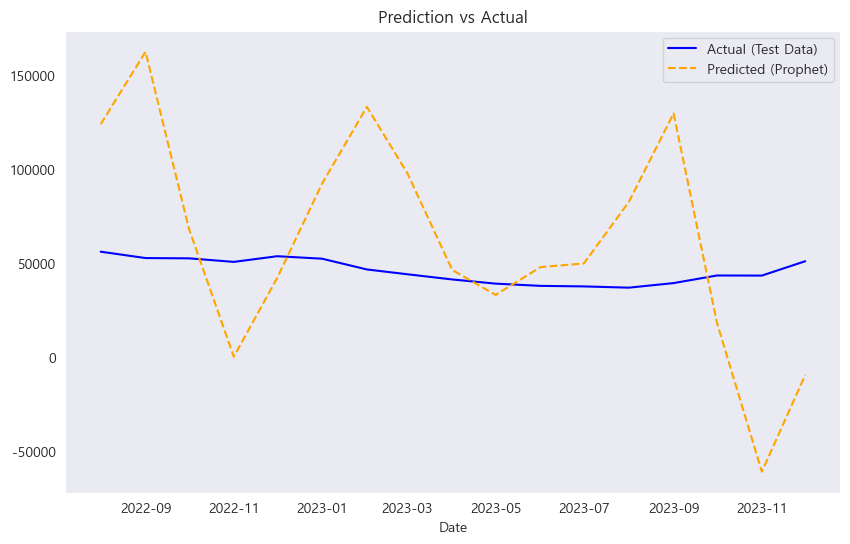

In [32]:
prophet_metrix_plot(train,test,'M')

#### 하이퍼파라미터 튜닝

In [33]:
# Grid Search를 위한 하이퍼파라미터 후보 설정
param_grid = {
    # 'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5, 1.0],
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.25, 0.5, 1.0, 2.0],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 5.0, 10.0],
    'seasonality_mode': ['multiplicative', 'additive']  
}

best_params = tune_prophet_parameters(param_grid, train, test, 'M')

02:43:42 - cmdstanpy - INFO - Chain [1] start processing
02:43:43 - cmdstanpy - INFO - Chain [1] done processing
02:43:43 - cmdstanpy - INFO - Chain [1] start processing
02:43:43 - cmdstanpy - INFO - Chain [1] done processing
02:43:43 - cmdstanpy - INFO - Chain [1] start processing
02:43:43 - cmdstanpy - INFO - Chain [1] done processing
02:43:43 - cmdstanpy - INFO - Chain [1] start processing
02:43:43 - cmdstanpy - INFO - Chain [1] done processing
02:43:43 - cmdstanpy - INFO - Chain [1] start processing
02:43:44 - cmdstanpy - INFO - Chain [1] done processing
02:43:44 - cmdstanpy - INFO - Chain [1] start processing
02:43:44 - cmdstanpy - INFO - Chain [1] done processing
02:43:44 - cmdstanpy - INFO - Chain [1] start processing
02:43:45 - cmdstanpy - INFO - Chain [1] done processing
02:43:45 - cmdstanpy - INFO - Chain [1] start processing
02:43:45 - cmdstanpy - INFO - Chain [1] done processing
02:43:45 - cmdstanpy - INFO - Chain [1] start processing
02:43:46 - cmdstanpy - INFO - Chain [1]

Best Parameters: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.1, 'seasonality_mode': 'multiplicative'}
Best RMSE: 22066.310141491897


02:44:21 - cmdstanpy - INFO - Chain [1] start processing
02:44:21 - cmdstanpy - INFO - Chain [1] done processing


MAE (Mean Absolute Error): 20028.300444558852
RMSE (Root Mean Squared Error): 22066.310141491897
MAPE (Mean Absolute Percentage Error): 42.30%


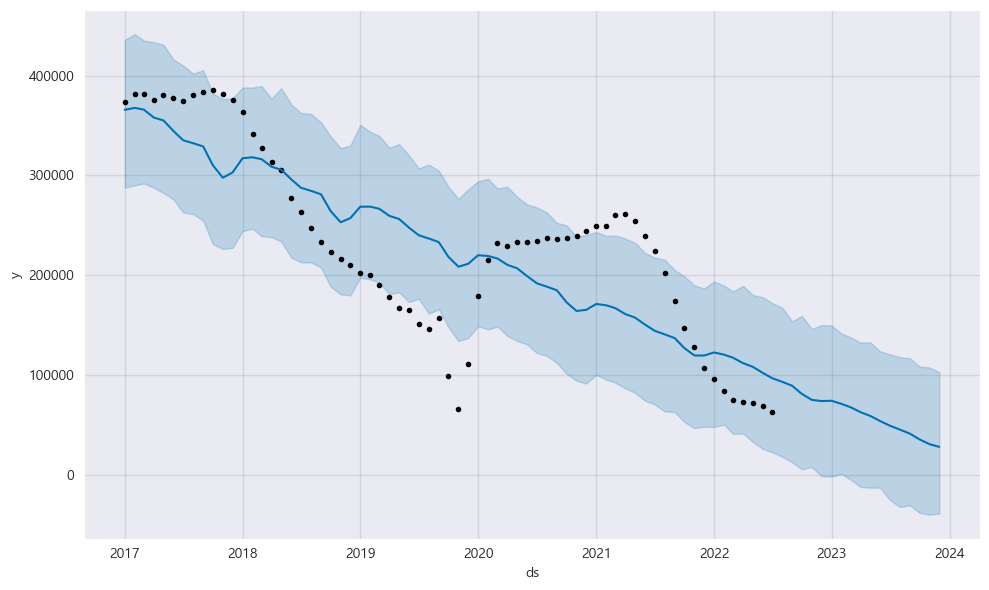

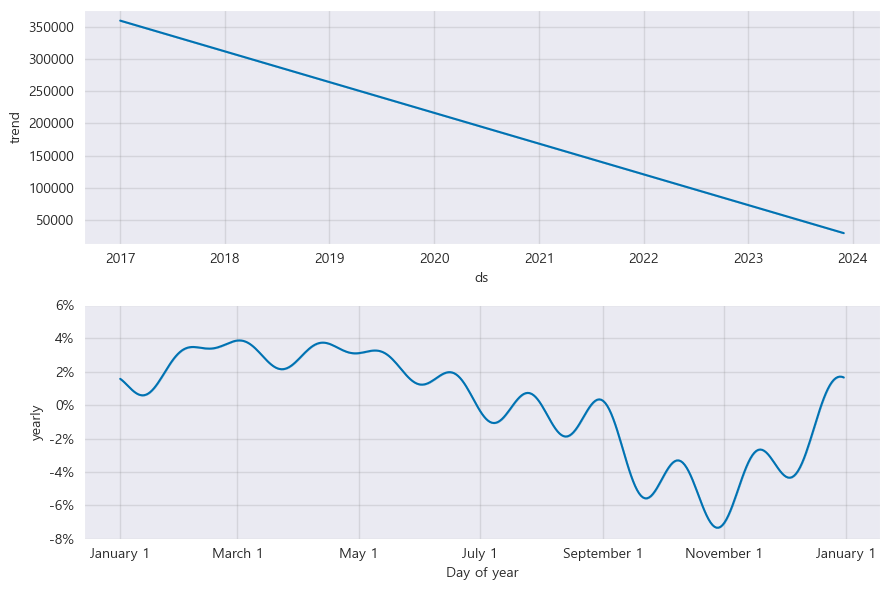

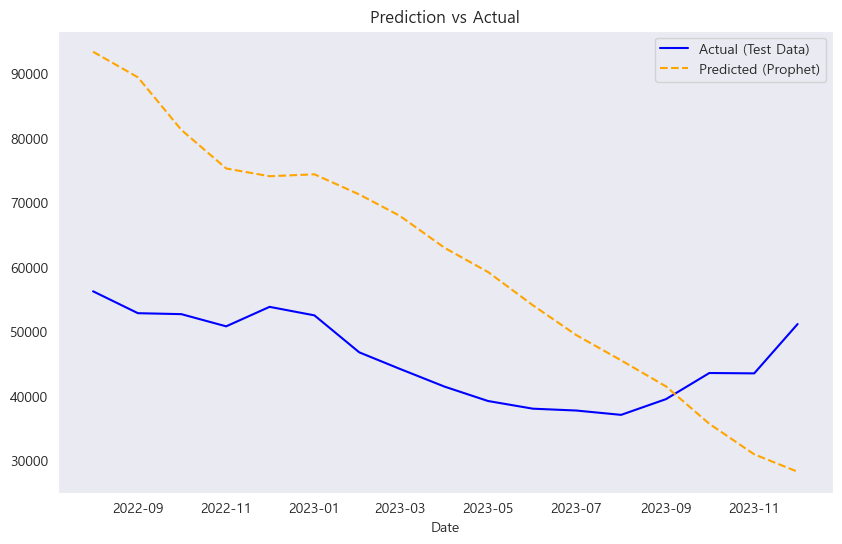

In [35]:
tune_prophet_parameters_plot(best_params,train,test, 'M')

#### 예측

02:44:23 - cmdstanpy - INFO - Chain [1] start processing
02:44:23 - cmdstanpy - INFO - Chain [1] done processing


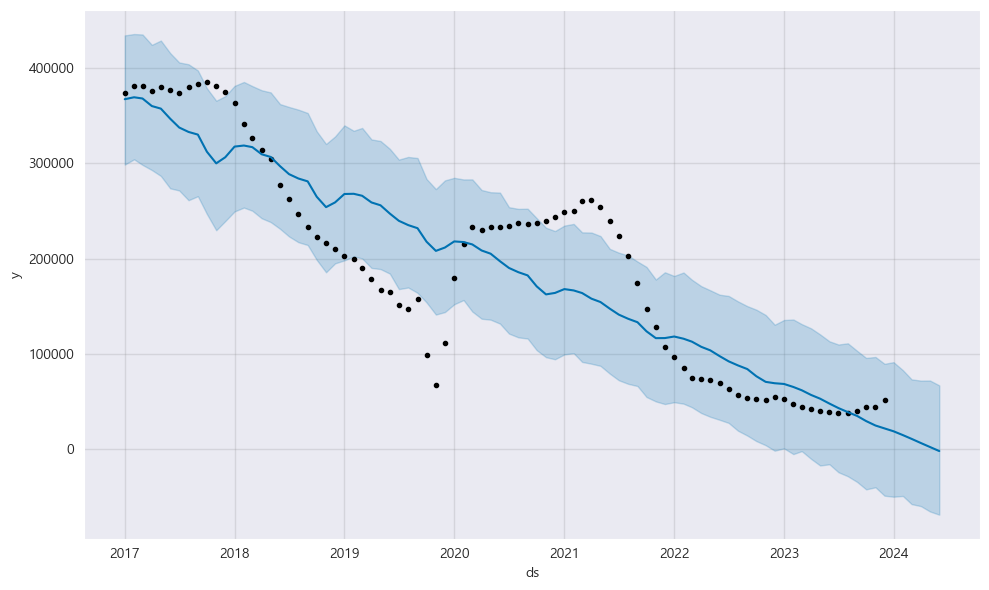

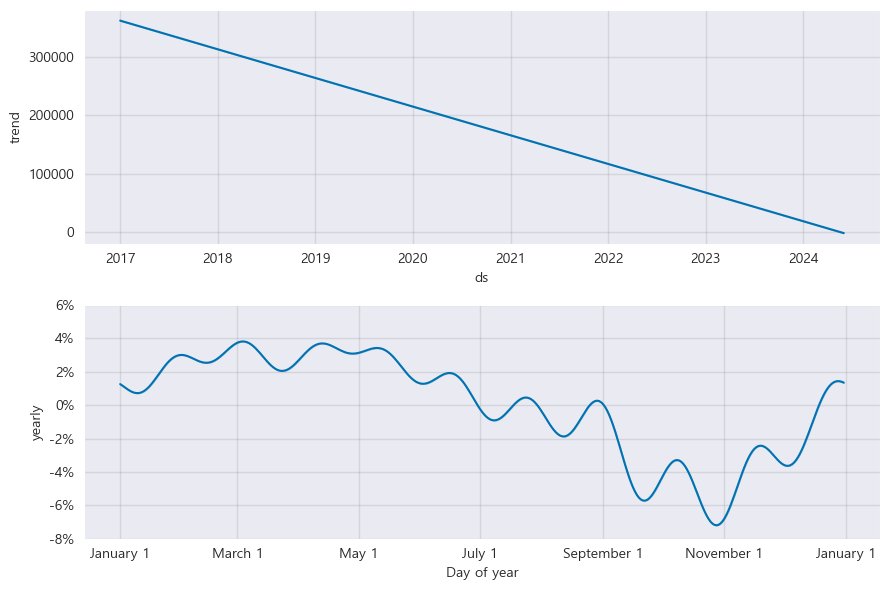

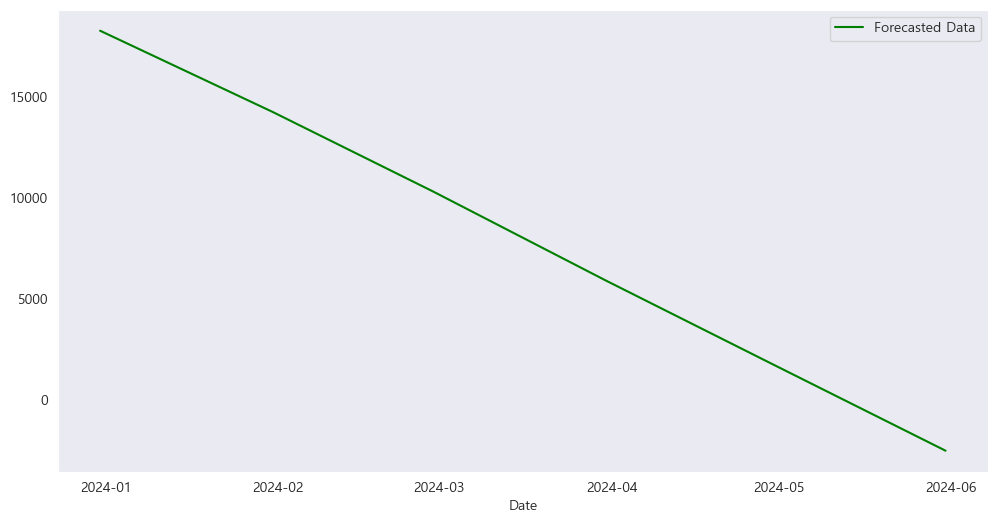

In [36]:
test_forecast = predict_2024(df_tmp, 6, 'M', 'green',best_params)

In [37]:
test_forecast[['ds','yhat']]

,ds,yhat
84,2023-12-31,18266.115339
85,2024-01-31,14245.672769
86,2024-02-29,10283.731075
87,2024-03-31,5881.976931
88,2024-04-30,1733.431671
89,2024-05-31,-2537.615999


In [38]:
df_nickel_stock = test_forecast[['ds','yhat']]
df_nickel_stock = df_nickel_stock.rename(columns={'yhat':'재고량'})

In [39]:
df_nickel_stock

,ds,재고량
84,2023-12-31,18266.115339
85,2024-01-31,14245.672769
86,2024-02-29,10283.731075
87,2024-03-31,5881.976931
88,2024-04-30,1733.431671
89,2024-05-31,-2537.615999


In [40]:
df_2024_forecast['재고량'] = df_nickel_stock['재고량']

In [41]:
df_2024_forecast

,ds,니켈가격,재고량
84,2023-12-31,26407.799177,18266.115339
85,2024-01-31,26341.269069,14245.672769
86,2024-02-29,25330.735914,10283.731075
87,2024-03-31,25676.138077,5881.976931
88,2024-04-30,25634.629688,1733.431671
89,2024-05-31,24983.092002,-2537.615999


### 환율

<Axes: >

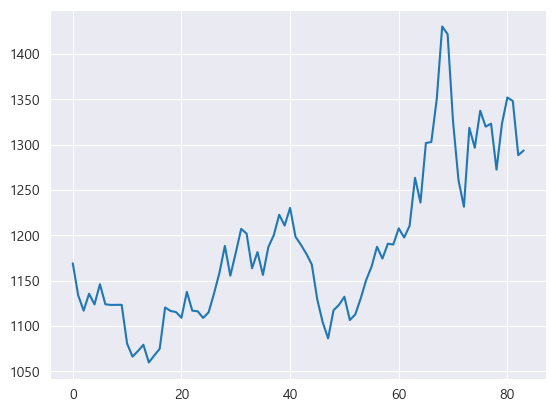

In [42]:
df_nickel['환율'].plot()

Additive 모델


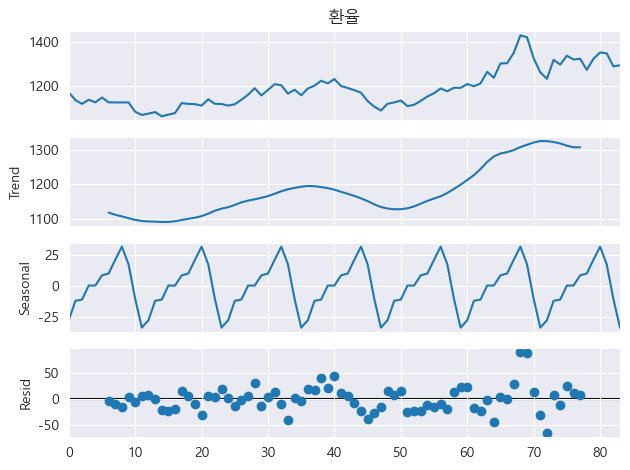

Multiplicative 모델


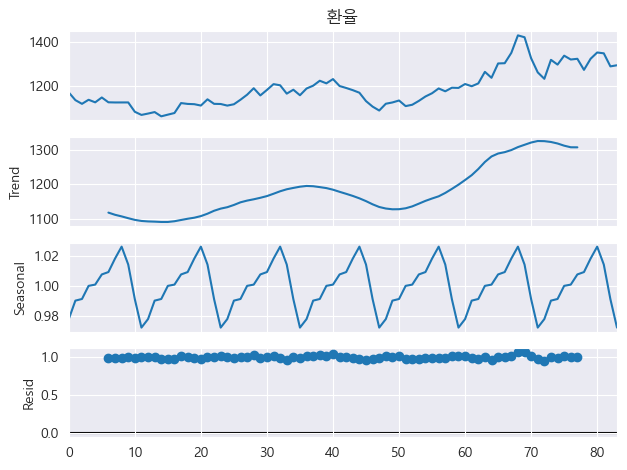

In [43]:
seasonal_decompose_graph(df_nickel, '환율', 12)

In [44]:
df_tmp, train, test = split_train_test(df_nickel, '환율')

02:44:37 - cmdstanpy - INFO - Chain [1] start processing
02:44:37 - cmdstanpy - INFO - Chain [1] done processing


MAE (Mean Absolute Error): 94.74150302783396
RMSE (Root Mean Squared Error): 107.08328958591224
MAPE (Mean Absolute Percentage Error): 7.17%


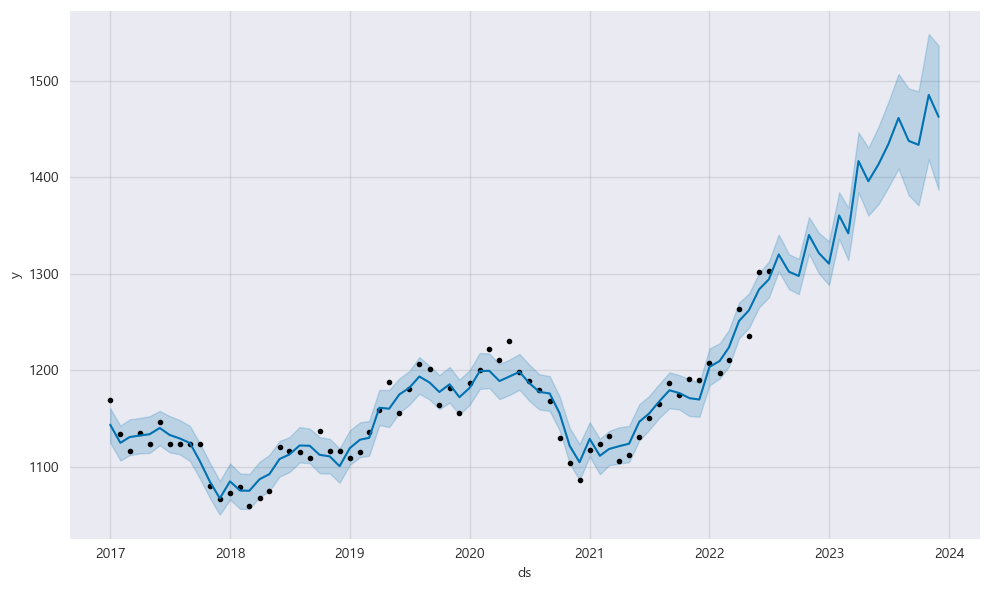

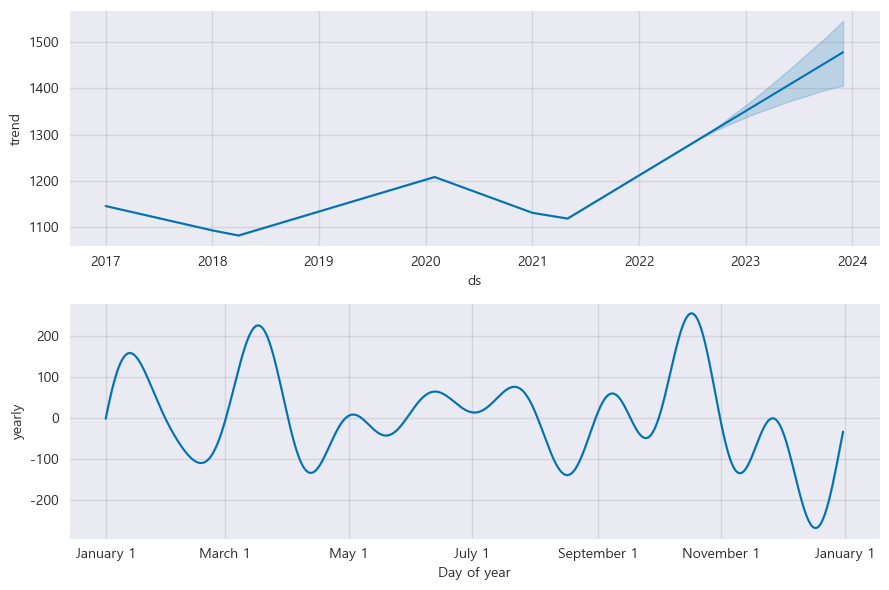

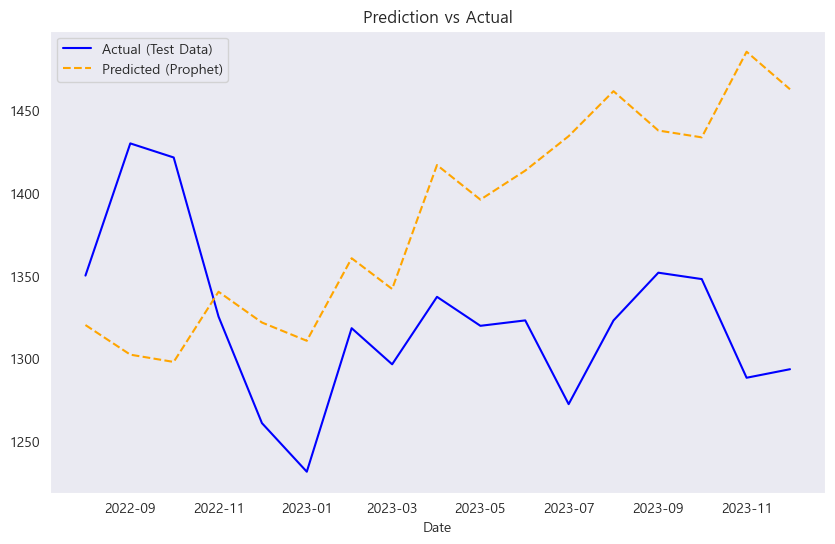

In [45]:
prophet_metrix_plot(train,test,'M')

#### 하이퍼파라미터 튜닝

In [46]:
# Grid Search를 위한 하이퍼파라미터 후보 설정
param_grid = {
    # 'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5, 1.0],
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.25, 0.5, 1.0, 2.0],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 5.0, 10.0],
    'seasonality_mode': ['multiplicative', 'additive']  
}

best_params = tune_prophet_parameters(param_grid, train, test,'M')

02:44:43 - cmdstanpy - INFO - Chain [1] start processing
02:44:43 - cmdstanpy - INFO - Chain [1] done processing
02:44:43 - cmdstanpy - INFO - Chain [1] start processing
02:44:43 - cmdstanpy - INFO - Chain [1] done processing
02:44:43 - cmdstanpy - INFO - Chain [1] start processing
02:44:43 - cmdstanpy - INFO - Chain [1] done processing
02:44:43 - cmdstanpy - INFO - Chain [1] start processing
02:44:44 - cmdstanpy - INFO - Chain [1] done processing
02:44:44 - cmdstanpy - INFO - Chain [1] start processing
02:44:44 - cmdstanpy - INFO - Chain [1] done processing
02:44:44 - cmdstanpy - INFO - Chain [1] start processing
02:44:44 - cmdstanpy - INFO - Chain [1] done processing
02:44:44 - cmdstanpy - INFO - Chain [1] start processing
02:44:44 - cmdstanpy - INFO - Chain [1] done processing
02:44:44 - cmdstanpy - INFO - Chain [1] start processing
02:44:45 - cmdstanpy - INFO - Chain [1] done processing
02:44:45 - cmdstanpy - INFO - Chain [1] start processing
02:44:45 - cmdstanpy - INFO - Chain [1]

Best Parameters: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 0.01, 'seasonality_mode': 'multiplicative'}
Best RMSE: 106.21316288772744


02:45:07 - cmdstanpy - INFO - Chain [1] start processing
02:45:07 - cmdstanpy - INFO - Chain [1] done processing


MAE (Mean Absolute Error): 95.27607984740312
RMSE (Root Mean Squared Error): 106.21316288772744
MAPE (Mean Absolute Percentage Error): 7.23%


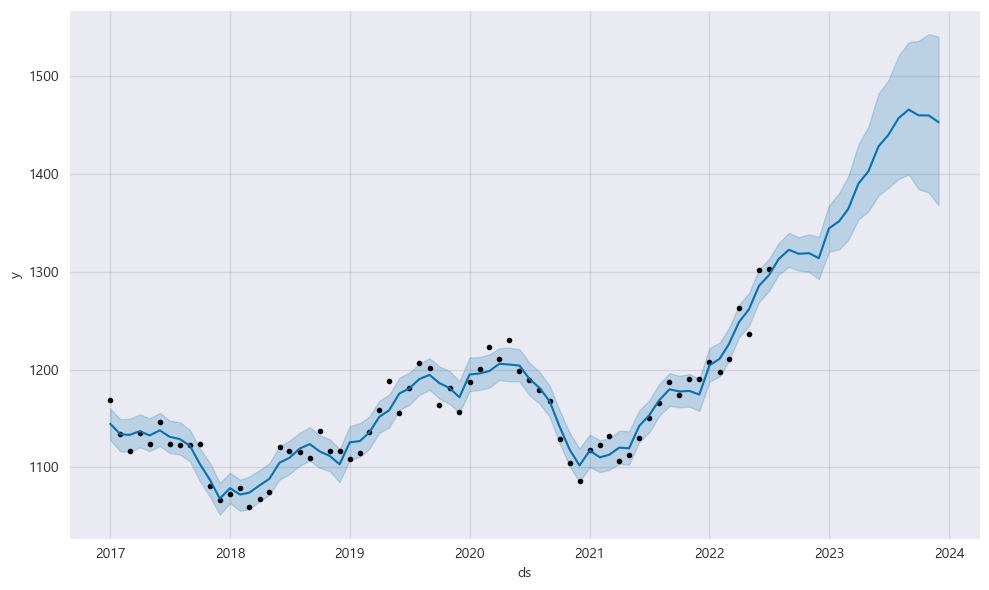

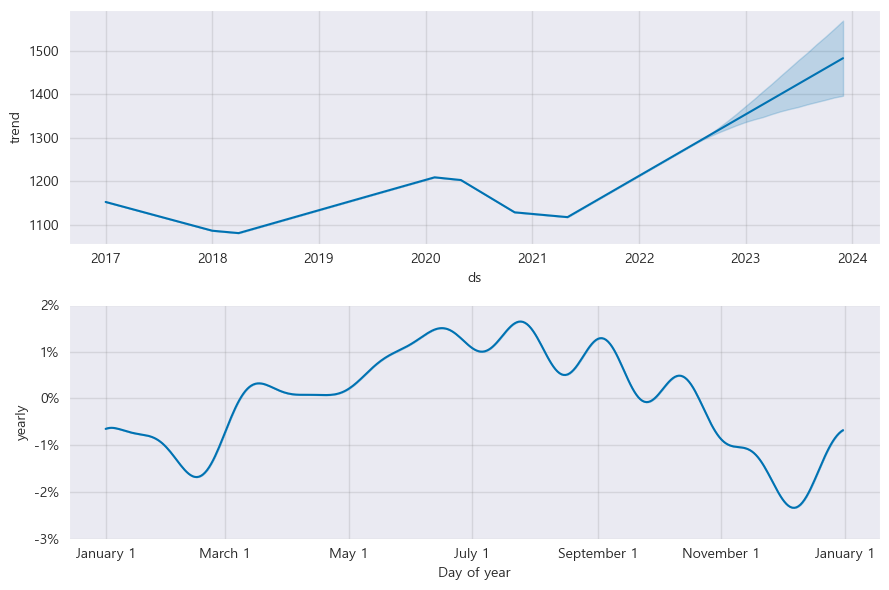

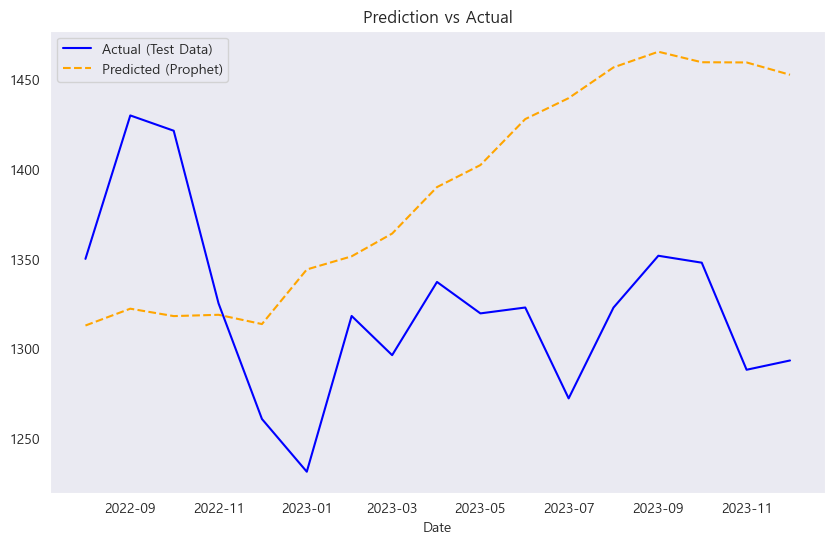

In [47]:
tune_prophet_parameters_plot(best_params,train,test, 'M')

#### 예측

02:45:08 - cmdstanpy - INFO - Chain [1] start processing
02:45:09 - cmdstanpy - INFO - Chain [1] done processing


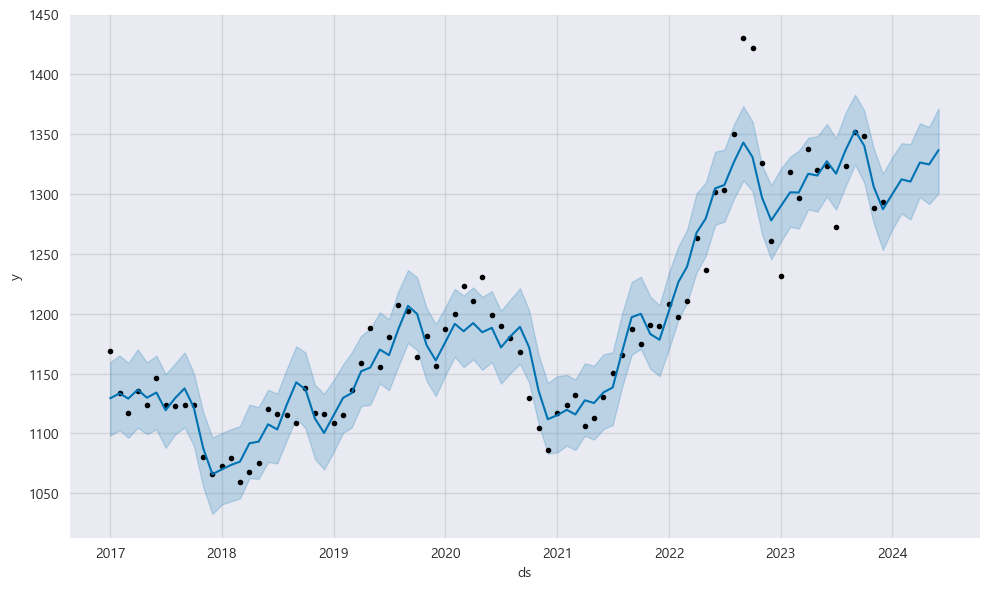

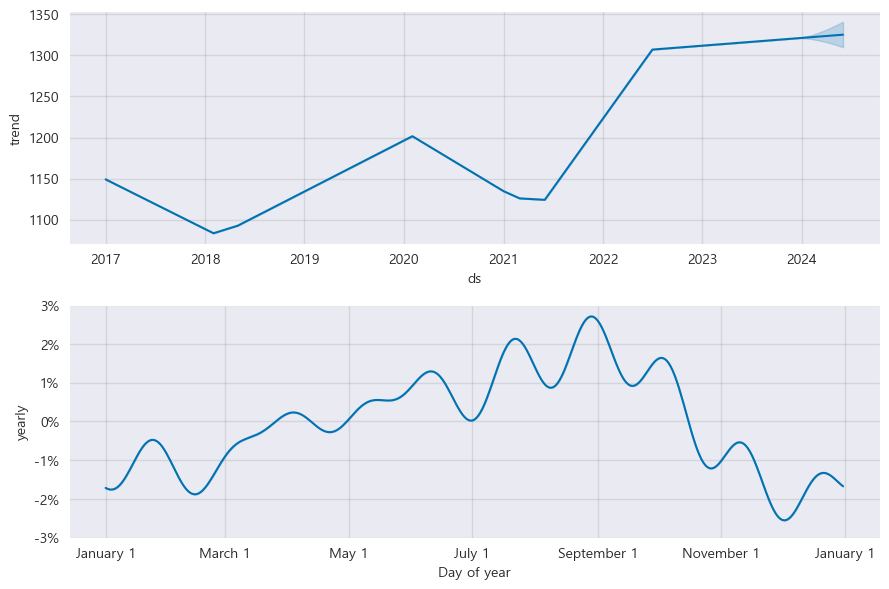

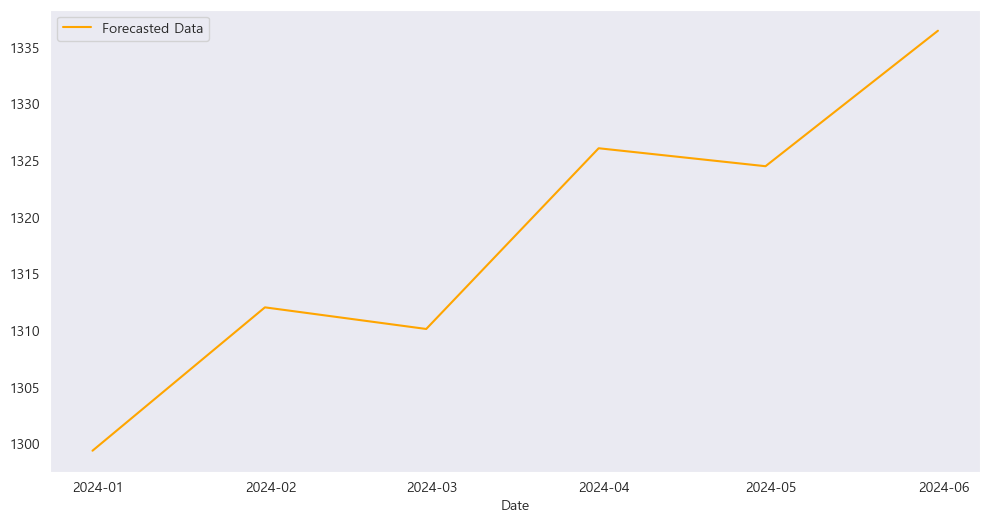

In [48]:
test_forecast = predict_2024(df_tmp, 6, 'M', 'orange',best_params)

In [49]:
test_forecast[['ds','yhat']]

,ds,yhat
84,2023-12-31,1299.423168
85,2024-01-31,1312.067204
86,2024-02-29,1310.160756
87,2024-03-31,1326.099107
88,2024-04-30,1324.515006
89,2024-05-31,1336.464376


In [50]:
df_er = test_forecast[['ds','yhat']]
df_er = df_er.rename(columns={'yhat':'환율'})

In [51]:
df_er

,ds,환율
84,2023-12-31,1299.423168
85,2024-01-31,1312.067204
86,2024-02-29,1310.160756
87,2024-03-31,1326.099107
88,2024-04-30,1324.515006
89,2024-05-31,1336.464376


In [52]:
df_2024_forecast['환율'] = df_er['환율']

In [53]:
df_2024_forecast

,ds,니켈가격,재고량,환율
84,2023-12-31,26407.799177,18266.115339,1299.423168
85,2024-01-31,26341.269069,14245.672769,1312.067204
86,2024-02-29,25330.735914,10283.731075,1310.160756
87,2024-03-31,25676.138077,5881.976931,1326.099107
88,2024-04-30,25634.629688,1733.431671,1324.515006
89,2024-05-31,24983.092002,-2537.615999,1336.464376


In [660]:
df_2024_forecast.to_csv('prophet_2024_forecast.csv',index=False)

### 생산량

In [56]:
df_production_consumption

,연도,생산량,소비량
0,2017,2065.960,2090.518
1,2018,2251.992,2339.103
2,2019,2430.243,2430.139
3,2020,2528.167,2442.837
4,2021,2784.683,2962.181
5,2022,3089.143,3003.505
6,2023,3429.284,3171.547


In [58]:
production_consumption = df_production_consumption.copy()

<Axes: >

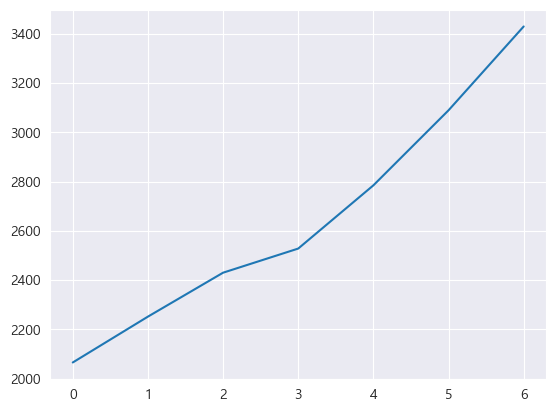

In [59]:
production_consumption['생산량'].plot()

Additive 모델


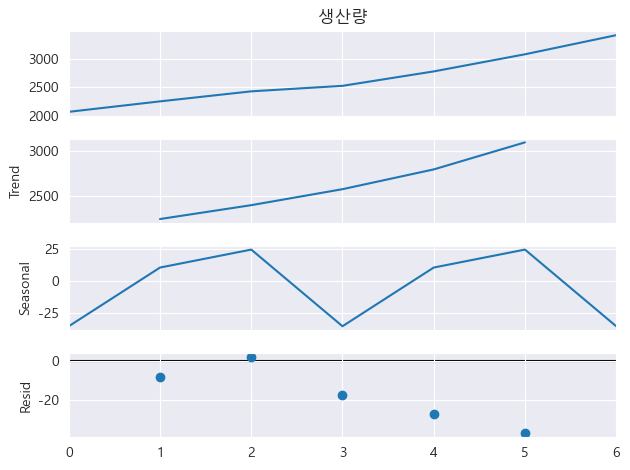

Multiplicative 모델


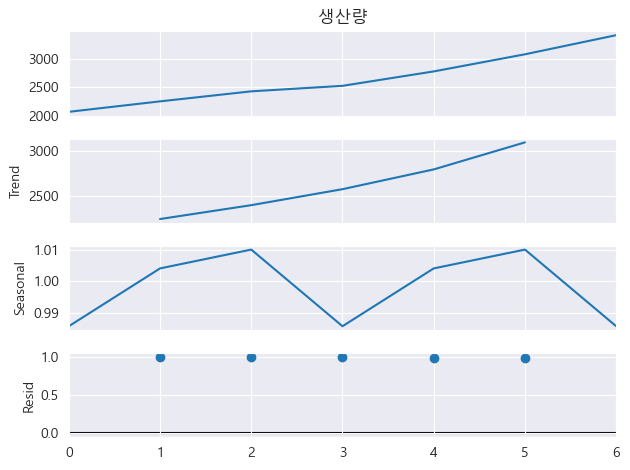

In [60]:
seasonal_decompose_graph(production_consumption, '생산량', 3)

In [62]:
df_tmp, train, test = split_train_test_production_consumption(production_consumption,'생산량')

In [63]:
df_tmp

,ds,y
0,2017-01-01,2065.960
1,2018-01-01,2251.992
2,2019-01-01,2430.243
3,2020-01-01,2528.167
4,2021-01-01,2784.683
5,2022-01-01,3089.143
6,2023-01-01,3429.284


02:46:23 - cmdstanpy - INFO - Chain [1] start processing
02:46:23 - cmdstanpy - INFO - Chain [1] done processing


MAE (Mean Absolute Error): 565.7240377620064
RMSE (Root Mean Squared Error): 584.7363743782877
MAPE (Mean Absolute Percentage Error): 17.17%


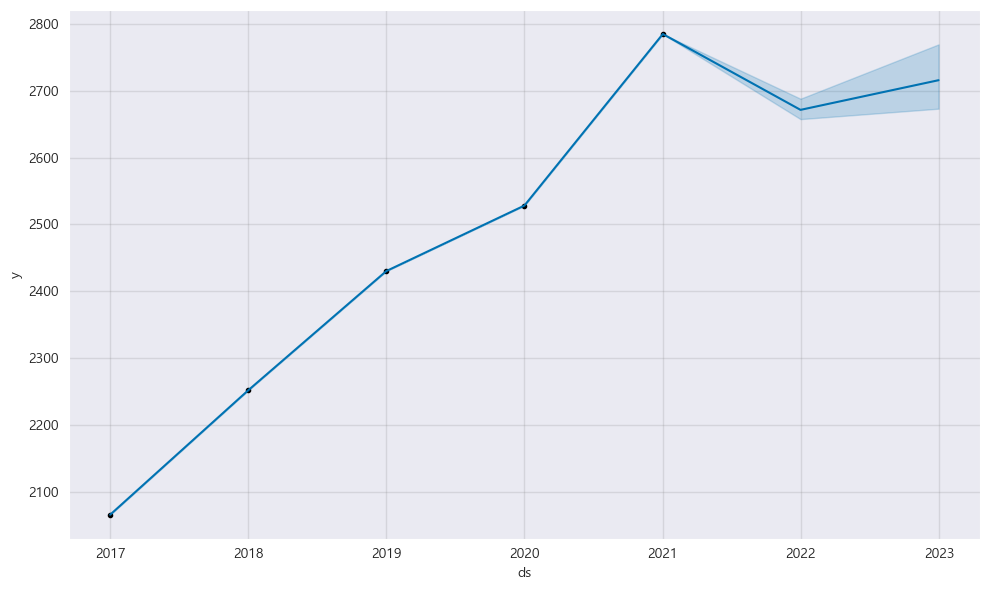

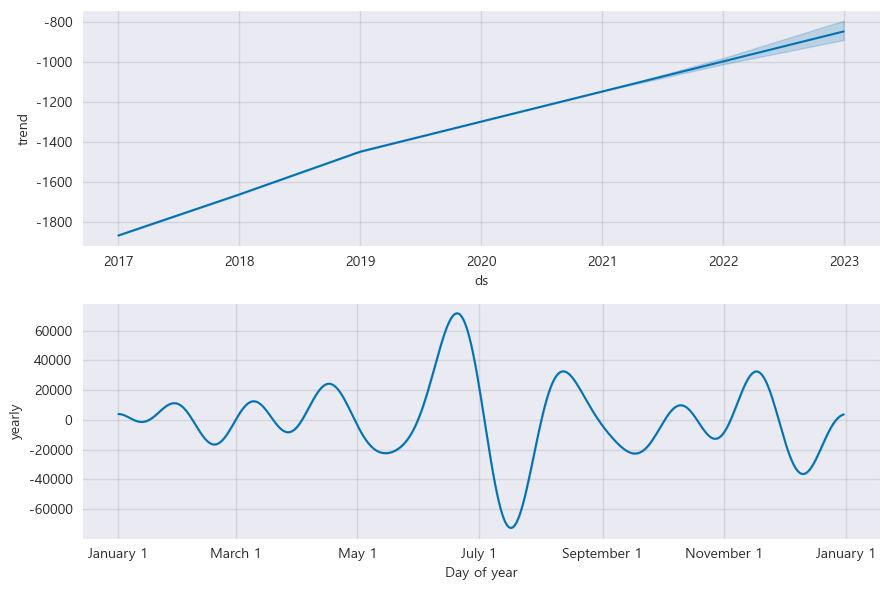

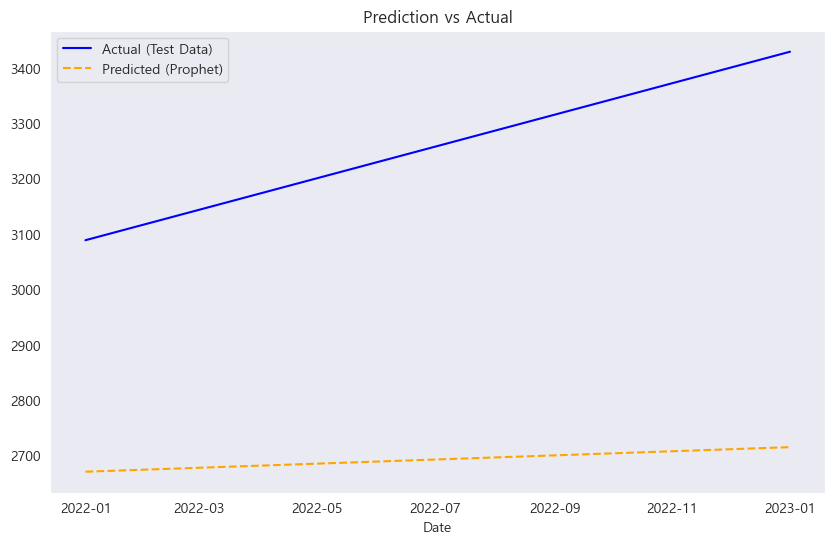

In [64]:
prophet_metrix_plot(train,test,'Y')

#### 하이퍼파라미터 튜닝

In [65]:
# Grid Search를 위한 하이퍼파라미터 후보 설정
param_grid = {
    # 'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5, 1.0],
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.25, 0.5, 1.0, 2.0],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 5.0, 10.0],
    'seasonality_mode': ['multiplicative', 'additive']  
}

best_params = tune_prophet_parameters(param_grid, train,test,'Y')

02:46:29 - cmdstanpy - INFO - Chain [1] start processing
02:46:29 - cmdstanpy - INFO - Chain [1] done processing
02:46:29 - cmdstanpy - INFO - Chain [1] start processing
02:46:29 - cmdstanpy - INFO - Chain [1] done processing
02:46:29 - cmdstanpy - INFO - Chain [1] start processing
02:46:29 - cmdstanpy - INFO - Chain [1] done processing
02:46:29 - cmdstanpy - INFO - Chain [1] start processing
02:46:29 - cmdstanpy - INFO - Chain [1] done processing
02:46:29 - cmdstanpy - INFO - Chain [1] start processing
02:46:29 - cmdstanpy - INFO - Chain [1] done processing
02:46:29 - cmdstanpy - INFO - Chain [1] start processing
02:46:29 - cmdstanpy - INFO - Chain [1] done processing
02:46:29 - cmdstanpy - INFO - Chain [1] start processing
02:46:30 - cmdstanpy - INFO - Chain [1] done processing
02:46:30 - cmdstanpy - INFO - Chain [1] start processing
02:46:30 - cmdstanpy - INFO - Chain [1] done processing
02:46:30 - cmdstanpy - INFO - Chain [1] start processing
02:46:30 - cmdstanpy - INFO - Chain [1]

Best Parameters: {'changepoint_prior_scale': 2.0, 'seasonality_prior_scale': 0.01, 'seasonality_mode': 'additive'}
Best RMSE: 100.68583688100927


02:49:46 - cmdstanpy - INFO - Chain [1] start processing
02:49:50 - cmdstanpy - INFO - Chain [1] done processing


MAE (Mean Absolute Error): 91.43883576981511
RMSE (Root Mean Squared Error): 100.68583688100927
MAPE (Mean Absolute Percentage Error): 2.75%


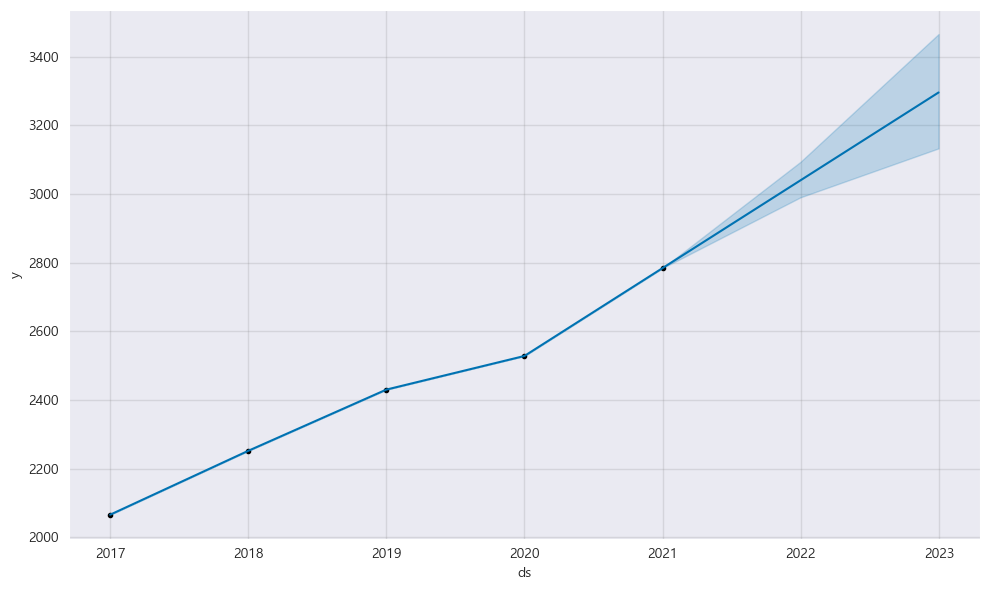

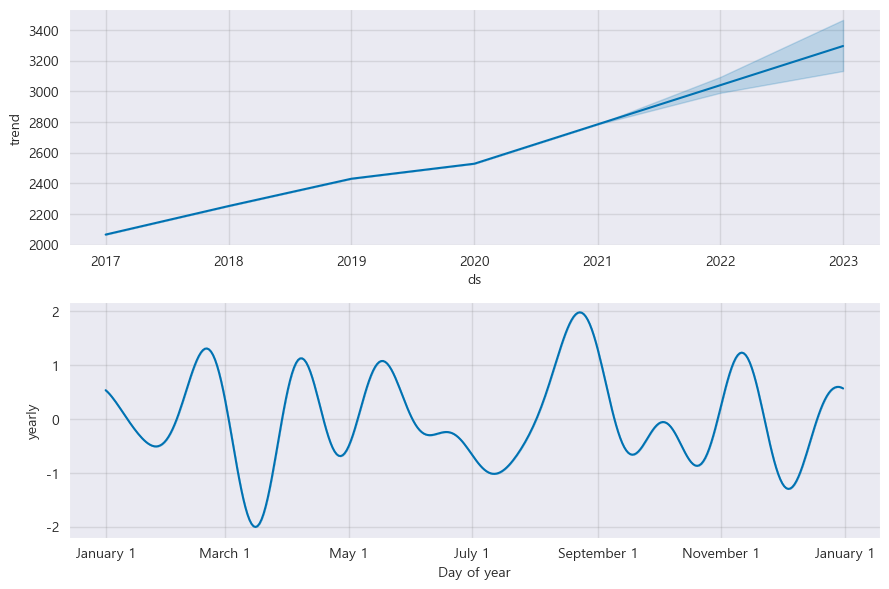

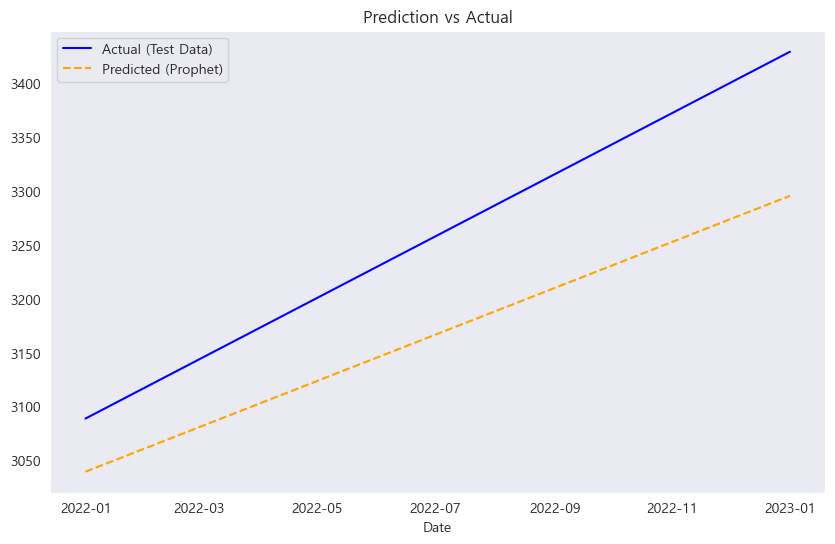

In [66]:
tune_prophet_parameters_plot(best_params,train, test, 'Y')

#### 예측

02:49:51 - cmdstanpy - INFO - Chain [1] start processing
02:49:52 - cmdstanpy - INFO - Chain [1] done processing


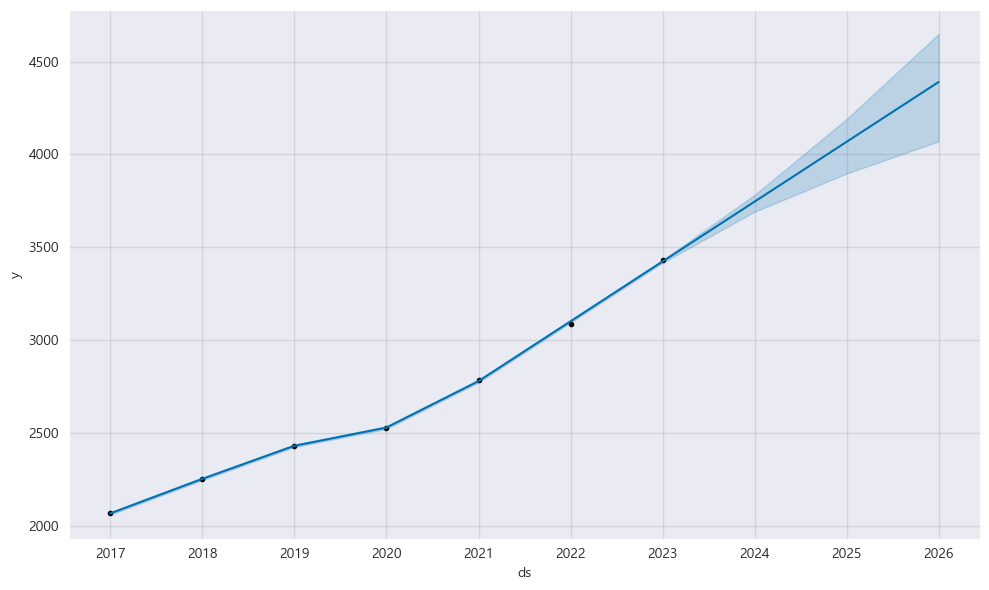

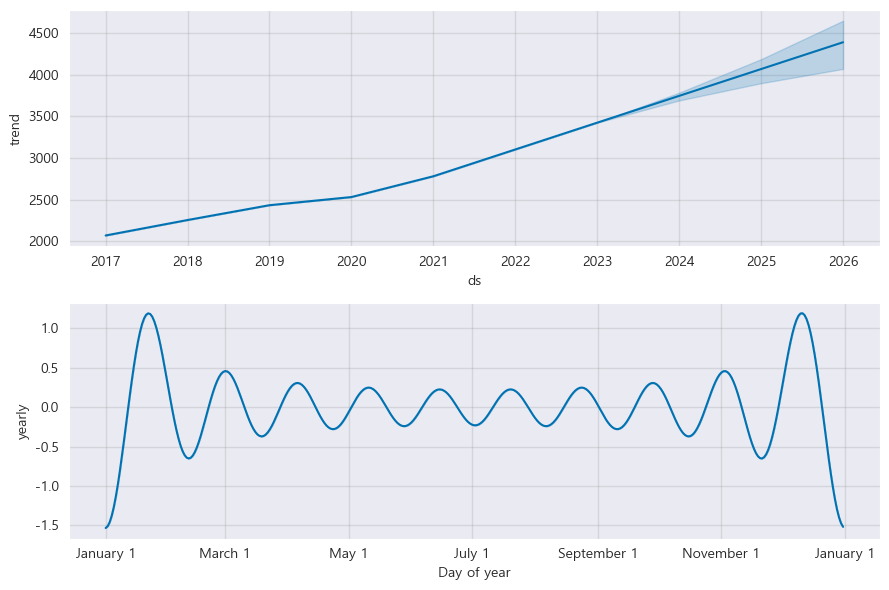

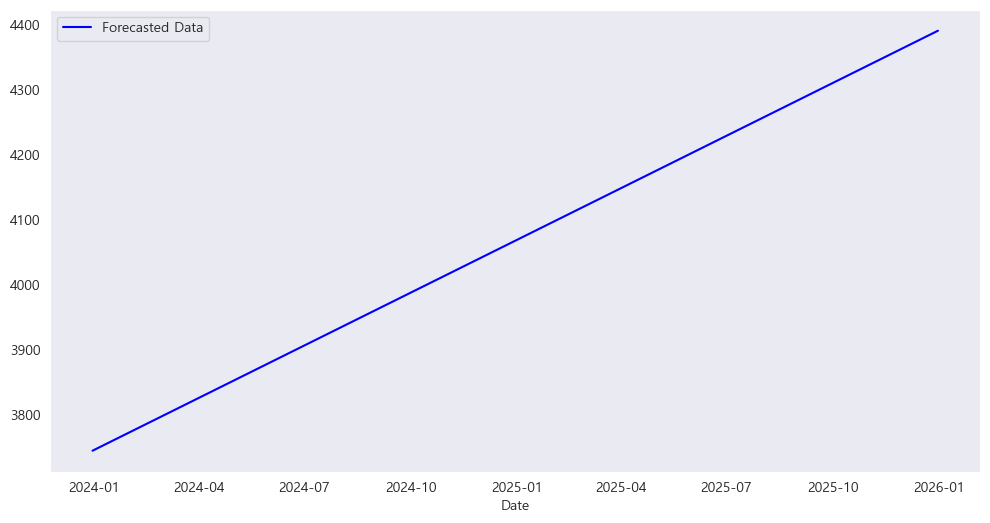

In [67]:
test_forecast = predict_2024(df_tmp, 3, 'Y', 'blue', best_params)

In [68]:
test_forecast[['ds','yhat']]

,ds,yhat
7,2023-12-31,3744.763171
8,2024-12-31,4067.907566
9,2025-12-31,4390.201870


In [69]:
df_consumption_production = test_forecast[['ds','yhat']]
df_consumption_production = df_consumption_production.rename(columns={'yhat':'생산량'})

In [70]:
df_consumption_production

,ds,생산량
7,2023-12-31,3744.763171
8,2024-12-31,4067.907566
9,2025-12-31,4390.201870


### 소비량

In [71]:
production_consumption

,연도,생산량,소비량
0,2017,2065.960,2090.518
1,2018,2251.992,2339.103
2,2019,2430.243,2430.139
3,2020,2528.167,2442.837
4,2021,2784.683,2962.181
5,2022,3089.143,3003.505
6,2023,3429.284,3171.547


<Axes: >

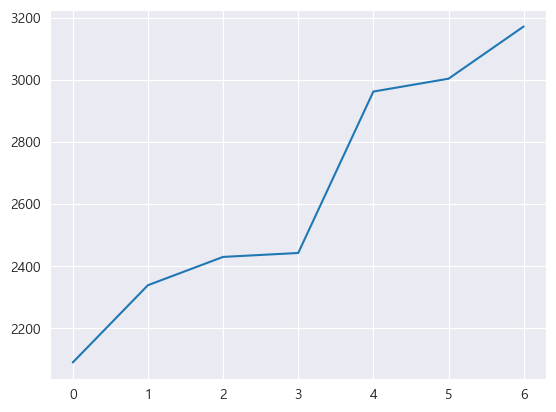

In [72]:
production_consumption['소비량'].plot()

Additive 모델


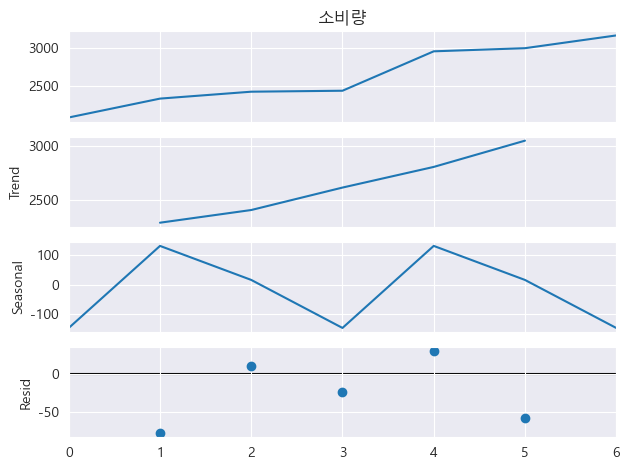

Multiplicative 모델


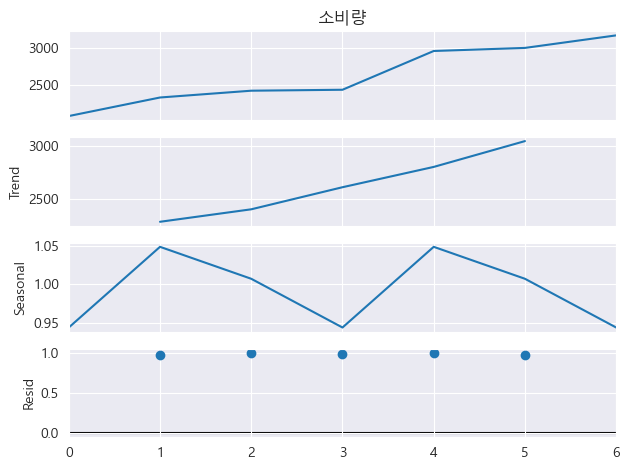

In [73]:
seasonal_decompose_graph(production_consumption, '소비량', 3)

In [74]:
df_tmp, train, test = split_train_test_production_consumption('소비량')

TypeError: split_train_test_production_consumption() missing 1 required positional argument: 'col_name'

In [ ]:
df_tmp

,ds,y
0,2017-01-01,2090.518
1,2018-01-01,2339.103
2,2019-01-01,2430.139
3,2020-01-01,2442.837
4,2021-01-01,2962.181
5,2022-01-01,3003.505
6,2023-01-01,3171.547


In [ ]:
train

,ds,y
0,2017-01-01,2090.518
1,2018-01-01,2339.103
2,2019-01-01,2430.139
3,2020-01-01,2442.837
4,2021-01-01,2962.181


04:19:13 - cmdstanpy - INFO - Chain [1] start processing
04:19:14 - cmdstanpy - INFO - Chain [1] done processing


MAE (Mean Absolute Error): 1130.4572684550744
RMSE (Root Mean Squared Error): 1157.680650538961
MAPE (Mean Absolute Percentage Error): 36.42%


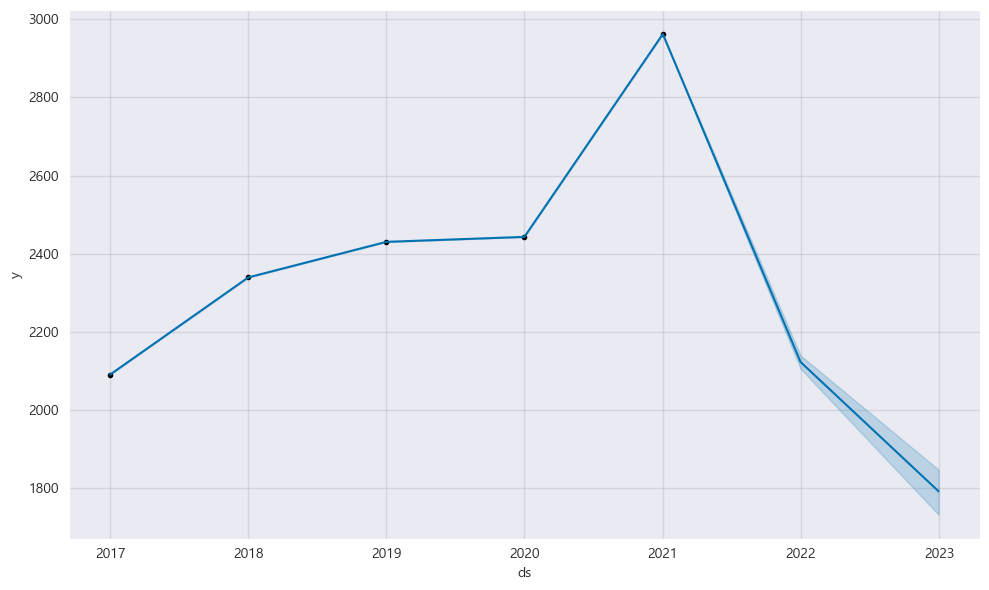

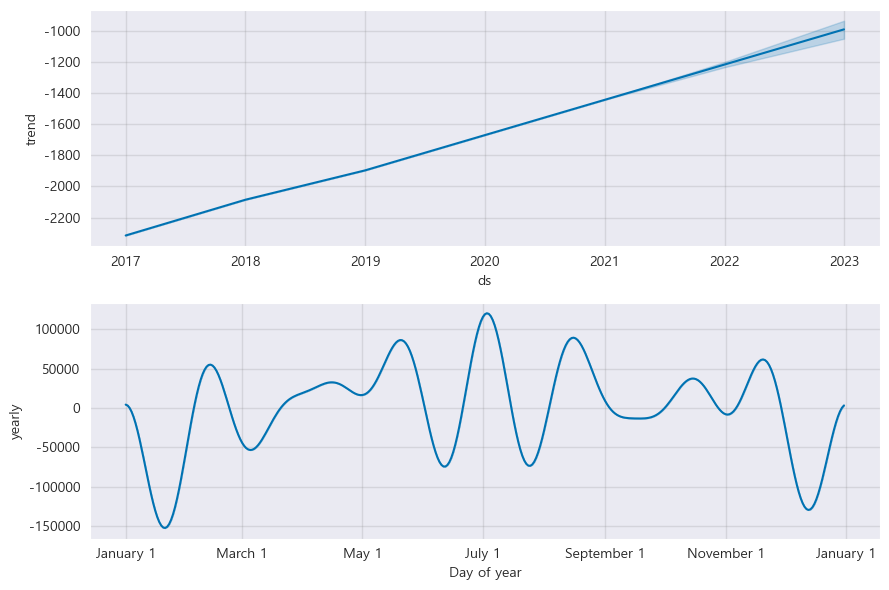

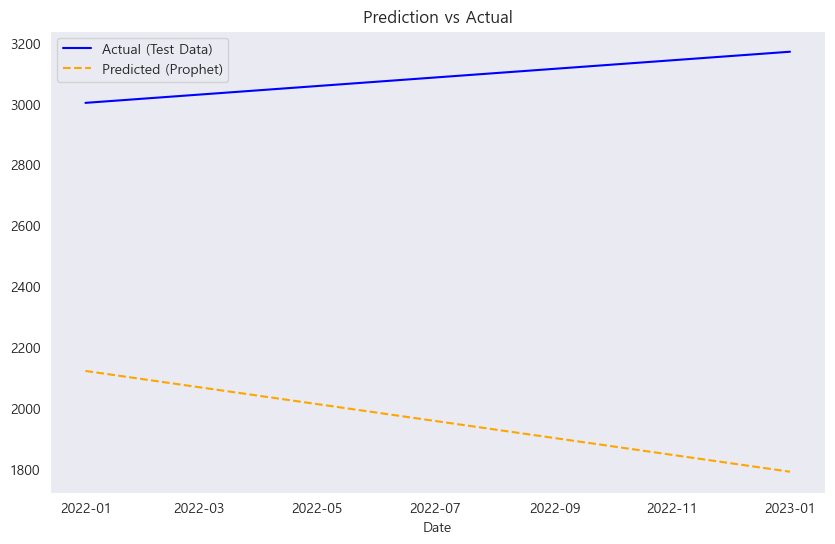

In [ ]:
prophet_metrix_plot(train,test,'Y')

#### 하이퍼파라미터 튜닝

In [ ]:
# Grid Search를 위한 하이퍼파라미터 후보 설정
param_grid = {
    # 'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5, 1.0],
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.25, 0.5, 1.0, 2.0],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 5.0, 10.0],
    'seasonality_mode': ['multiplicative', 'additive']  
}

best_params = tune_prophet_parameters(param_grid, train, test,'Y')

04:19:58 - cmdstanpy - INFO - Chain [1] start processing
04:19:58 - cmdstanpy - INFO - Chain [1] done processing
04:19:58 - cmdstanpy - INFO - Chain [1] start processing
04:19:58 - cmdstanpy - INFO - Chain [1] done processing
04:19:58 - cmdstanpy - INFO - Chain [1] start processing
04:19:58 - cmdstanpy - INFO - Chain [1] done processing
04:19:59 - cmdstanpy - INFO - Chain [1] start processing
04:19:59 - cmdstanpy - INFO - Chain [1] done processing
04:19:59 - cmdstanpy - INFO - Chain [1] start processing
04:19:59 - cmdstanpy - INFO - Chain [1] done processing
04:19:59 - cmdstanpy - INFO - Chain [1] start processing
04:19:59 - cmdstanpy - INFO - Chain [1] done processing
04:19:59 - cmdstanpy - INFO - Chain [1] start processing
04:19:59 - cmdstanpy - INFO - Chain [1] done processing
04:19:59 - cmdstanpy - INFO - Chain [1] start processing
04:19:59 - cmdstanpy - INFO - Chain [1] done processing
04:19:59 - cmdstanpy - INFO - Chain [1] start processing
04:20:00 - cmdstanpy - INFO - Chain [1]

Best Parameters: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.01, 'seasonality_mode': 'additive'}
Best RMSE: 12.478256567696299


04:22:53 - cmdstanpy - INFO - Chain [1] start processing
04:22:53 - cmdstanpy - INFO - Chain [1] done processing


MAE (Mean Absolute Error): 9.69284048327222
RMSE (Root Mean Squared Error): 12.478256567696299
MAPE (Mean Absolute Percentage Error): 0.31%


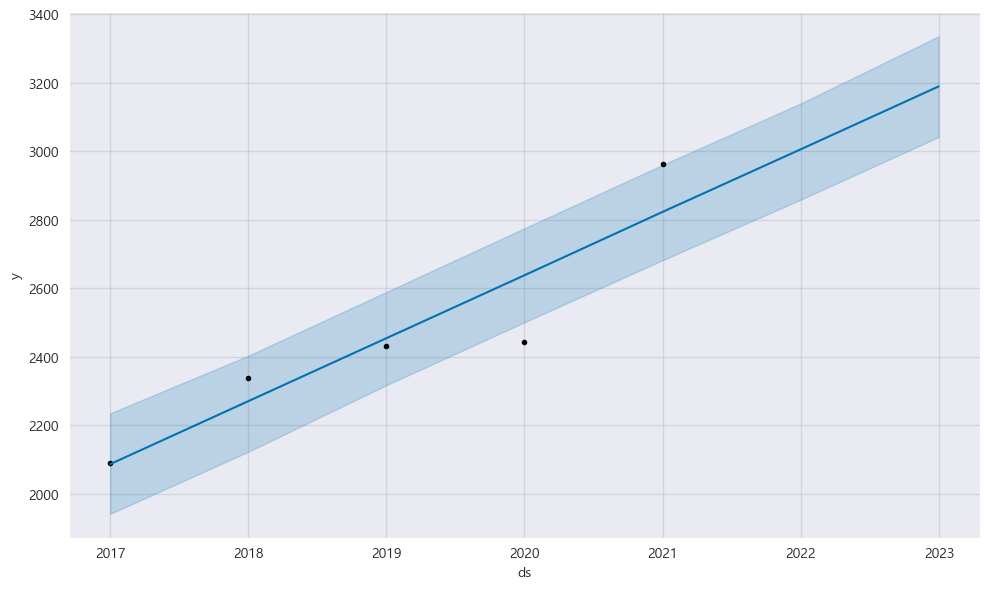

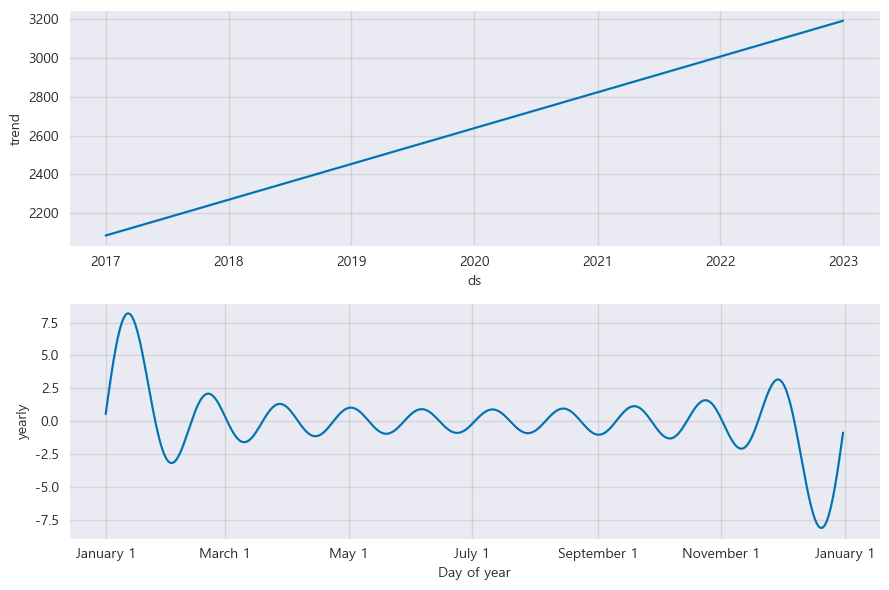

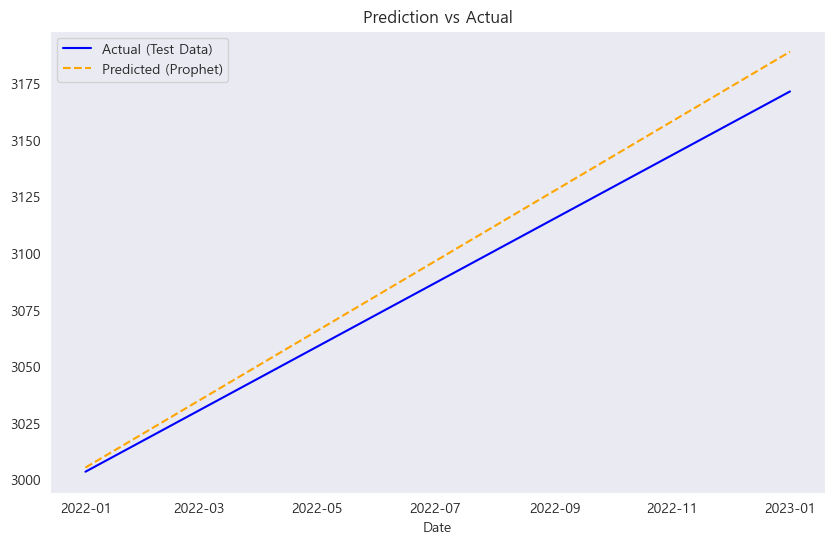

In [ ]:
tune_prophet_parameters_plot(best_params,train,test, 'Y')

#### 예측

04:23:30 - cmdstanpy - INFO - Chain [1] start processing
04:23:30 - cmdstanpy - INFO - Chain [1] done processing


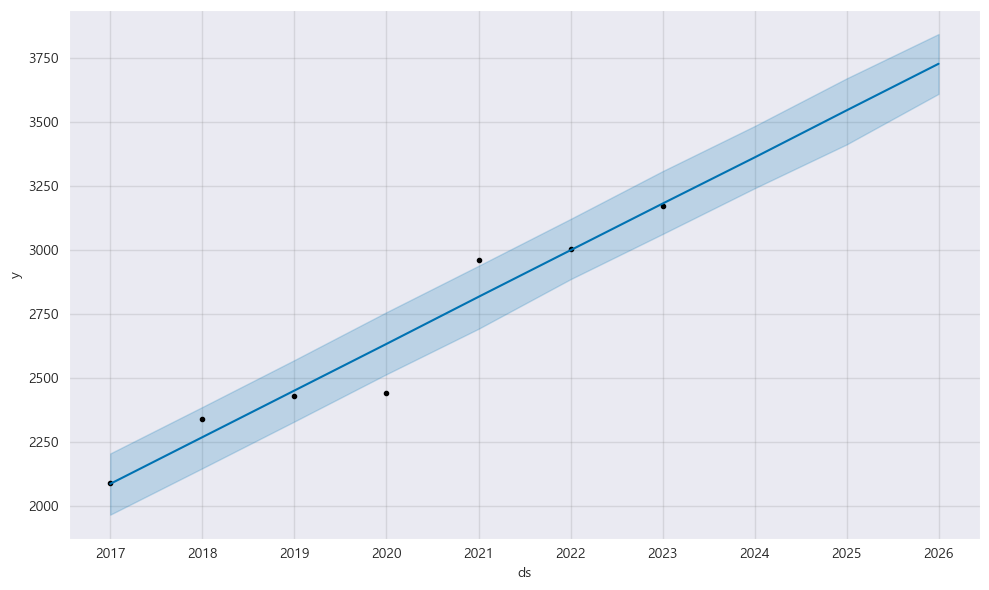

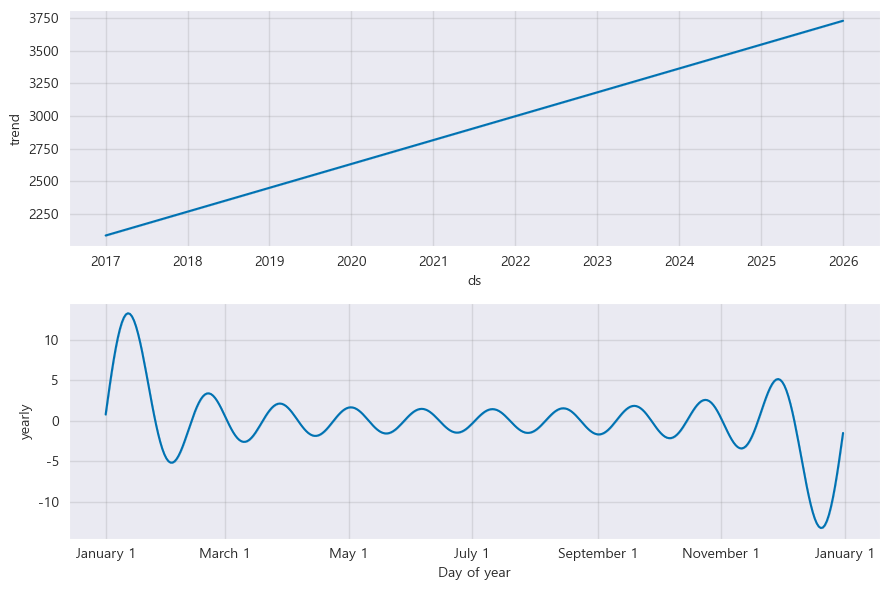

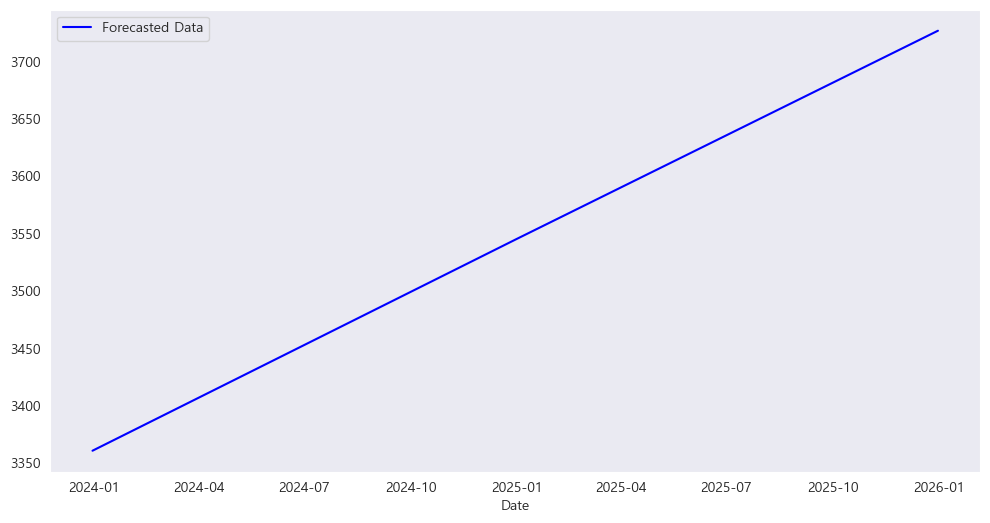

In [ ]:
test_forecast = predict_2024(df_tmp, 3, 'Y', 'blue', best_params)

In [ ]:
test_forecast[['ds','yhat']]

,ds,yhat
7,2023-12-31,3360.754555
8,2024-12-31,3544.931907
9,2025-12-31,3726.801247


In [ ]:
df_consumption = test_forecast[['ds','yhat']]
df_consumption = df_consumption.rename(columns={'yhat':'소비량'})

In [ ]:
df_consumption

,ds,소비량
7,2023-12-31,3360.754555
8,2024-12-31,3544.931907
9,2025-12-31,3726.801247


In [ ]:
df_consumption_production['소비량'] = df_consumption['소비량']

In [ ]:
df_consumption_production

,ds,생산량,소비량
7,2023-12-31,3744.763171,3360.754555
8,2024-12-31,4067.907566,3544.931907
9,2025-12-31,4390.201870,3726.801247


In [728]:
df_consumption_production.to_csv('prophet_2024_consumption_production.csv', index=False)